### CAPITULO 0: Tareas preliminares

Importación de librerías iniciales

In [62]:
# -- Análisis Descriptivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import re
import plotly.express as px
import seaborn as sns
from collections import namedtuple
import scipy.stats as stats
import warnings
import sklearn.impute as skl_imp
#import ydata_profiling
import scipy.stats as stats
from sklearn.preprocessing import scale
from scipy.stats import chi2_contingency
# -- Modelización
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pycaret
from pycaret.regression import *
from xgboost import XGBClassifier
from sklearn import metrics
from statsmodels.formula.api import ols 
import statsmodels.api as sm
import patsy
from relativeImp import relativeImp
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import scipy.stats as stats
from sklearn.ensemble import GradientBoostingRegressor

Importación del dataset

In [63]:
# Importo el df earthquake
df = pd.read_csv('/Users/inesmurcortes/Documents/GitHub/Eathquake/earthquake.csv')

### CAPITULO 2: Análisis Descriptivo

In [3]:
df.head(10)

Time                                  Place  Latitude  \
0  2023-02-17T09:37:34.868Z           130 km SW of Tual, Indonesia   -6.5986   
1  2023-02-16T05:37:05.138Z          7 km SW of Port-Olry, Vanuatu  -15.0912   
2  2023-02-15T18:10:10.060Z            Masbate region, Philippines   12.3238   
3  2023-02-15T06:38:09.034Z        54 km WNW of Otaki, New Zealand  -40.5465   
4  2023-02-14T13:16:51.072Z            2 km NW of Lele?ti, Romania   45.1126   
5  2023-02-13T09:18:07.995Z          Kermadec Islands, New Zealand  -29.5218   
6  2023-02-11T15:31:26.464Z                Tristan da Cunha region  -35.3341   
7  2023-02-11T08:55:07.845Z                                    NaN    3.6213   
8  2023-02-09T21:12:19.743Z                        Carlsberg Ridge   -1.2376   
9  2023-02-09T10:53:17.268Z  45 km SW of Kirakira, Solomon Islands  -10.7636   

   Longitude    Depth  Mag MagType    nst    gap    dmin  ...  \
0   132.0763   38.615  6.1     mww  119.0   51.0   2.988  ...   
1   167.0294   36.029  5.6     mww   81.0   26.0   0.392  ...   
2   123.8662   20.088  6.1     mww  148.0   47.0   5.487  ...   
3   174.5709   74.320  5.7     mww   81.0   40.0   0.768  ...   
4    23.1781   10.000  5.6     mww  132.0   28.0   1.197  ...   
5  -177.9727  374.033  6.1     mww   47.0  178.0   0.263  ...   
6   -15.6399   10.000  5.6     mww   55.0   84.0  21.230  ...   
7   126.6944   48.780  5.9     mww  130.0   37.0   2.909  ...   
8    67.5366   10.000  5.5     mww   53.0   50.0   5.722  ...   
9   161.6440   35.000  5.5     mww   86.0   31.0   2.127  ...   

                    Updated Unnamed: 14        Type horizontalError  \
0  2023-02-17T17:58:24.040Z         NaN  earthquake            6.41   
1  2023-02-17T05:41:32.448Z         NaN  earthquake            5.99   
2  2023-02-16T20:12:32.595Z         NaN  earthquake            8.61   
3  2023-02-16T06:42:09.738Z         NaN  earthquake            3.68   
4  2023-02-17T09:15:18.586Z         NaN  earthquake            4.85   
5  2023-02-14T09:20:59.238Z         NaN  earthquake           15.39   
6  2023-02-12T15:34:52.841Z         NaN  earthquake            8.13   
7  2023-02-12T08:58:20.552Z         NaN  earthquake            2.62   
8  2023-02-14T14:31:35.223Z         NaN  earthquake            5.45   
9  2023-02-10T10:56:36.462Z         NaN  earthquake            8.17   

   depthError magError  magNst    status  locationSource  magSource  
0       5.595    0.065    23.0  reviewed              us         us  
1       6.080    0.073    18.0  reviewed              us         us  
2       4.399    0.037    71.0  reviewed              us         us  
3       4.922    0.065    23.0  reviewed              us         us  
4       1.794    0.032    95.0  reviewed              us         us  
5       5.630    0.093    11.0  reviewed              us         us  
6       1.789    0.073    18.0  reviewed              us         us  
7       5.729    0.054    33.0  reviewed              us         us  
8       1.884    0.062    25.0  reviewed              us         us  
9       1.817    0.065    23.0  reviewed              us         us  

[10 rows x 23 columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [65]:
# Análisis de número de valores únicos
df.nunique()

Time               37331
Place              25800
Latitude           31722
Longitude          33478
Depth               4168
Mag                  264
MagType               18
nst                  734
gap                 1160
dmin                3376
rms                  198
net                   16
ID                 37331
Updated            36991
Unnamed: 14            0
Type                   4
horizontalError      453
depthError           756
magError             235
magNst               289
status                 2
locationSource        54
magSource             54
dtype: int64

#### 1. Análisis de variables

In [66]:
# A raíz de ver los tipos de variables y el número de valores únicos, vamos a corregir las clases que son numéricas/strings y podrían ser categóricas. 
# Lista de columnas con menos de 20 valores distintos
to_factor = list(df.loc[:,df.nunique() < 20]);  

# Transformación de variables a tipo categórico
df[to_factor] = df[to_factor].astype('category')

print(f'Columnas transformadas: {to_factor}')


Columnas transformadas: ['MagType', 'net', 'Unnamed: 14', 'Type', 'status']


In [67]:
# Descripción de valores no numéricos
df.describe(exclude=np.number)

Time                          Place MagType  \
count                      37331                          37047   37331   
unique                     37331                          25800      18   
top     2023-02-17T09:37:34.868Z  South Sandwich Islands region      mw   
freq                           1                            664   18700   

          net          ID                   Updated Unnamed: 14        Type  \
count   37331       37331                     37331           0       37331   
unique     16       37331                     36991           0           4   
top        us  us6000jpl7  2018-06-04T20:43:44.000Z         NaN  earthquake   
freq    23364           1                       143         NaN       37080   

          status locationSource magSource  
count      37331          37331     37331  
unique         2             54        54  
top     reviewed             us        us  
freq       37317          23069     13264

In [68]:
# Descripción de valores numéricos
df.describe()

Latitude     Longitude         Depth           Mag          nst  \
count  37331.000000  37331.000000  37197.000000  37331.000000  7473.000000   
mean       5.457651     38.877695     58.583346      5.948616   265.481065   
std       30.789822    123.090934    109.563400      0.455160   161.982149   
min      -77.080000   -179.997000     -4.000000      5.500000     0.000000   
25%      -16.519800    -75.807000     15.000000      5.600000   134.000000   
50%        1.153000     98.577000     28.500000      5.800000   241.000000   
75%       33.786000    143.347850     41.000000      6.140000   372.000000   
max       87.199000    180.000000    700.000000      9.500000   934.000000   

                gap         dmin           rms  horizontalError    depthError  \
count  10087.000000  4395.000000  20218.000000      3970.000000  20827.000000   
mean      45.014891     4.315178      1.000779         7.324982     10.679092   
std       34.311032     5.480411      0.356822         5.400729     10.660510   
min        8.000000     0.004505      0.005000         0.085000      0.000000   
25%       24.100000     1.155000      0.890000         5.700000      3.600000   
50%       36.000000     2.509000      1.000000         7.100000      6.100000   
75%       54.800000     5.127500      1.110000         8.500000     16.200000   
max      360.000000    39.730000     42.410000        99.000000    569.200000   

           magError       magNst  
count  16551.000000  5372.000000  
mean       0.261882    46.974870  
std        0.169566    60.441745  
min        0.000000     0.000000  
25%        0.200000    17.000000  
50%        0.200000    31.000000  
75%        0.330000    55.000000  
max        1.840000   941.000000

In [69]:
# Otra de las variables que no aporta mucha información directamente es Time, ya que es un string con formato YYYY-MM-DDT00:00:00.000Z. 
# Vamos a extraer sus características y almacenarlas en diferentes columnas
# En primer lugar, comprobamos que no hay errores de formato y que los 37K registros siguen el mismo patrón

regex_3 = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z$'

ls = []
for index, row in df.iterrows():
    if not re.match(regex_3, row['Time']):
        ls.append(row['Time'])

ls

# Devuelve una lista vacía, por lo que procedemos a extraer el año, mes, día, hora de cada evento sísmico.

# Creamos 4 patrones regex para año, día, mes y hora del seísmo
regex_year = r'^(\d{4})-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z$'
regex_month = r'^\d{4}-(\d{2})-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z$'
regex_day = r'^\d{4}-\d{2}-(\d{2})T\d{2}:\d{2}:\d{2}\.\d{3}Z$'
regex_hour = r'^\d{4}-\d{2}-\d{2}T(\d{2}):\d{2}:\d{2}\.\d{3}Z$'

# Extraemos la información en nuevas columnas del df
df['year'] = df['Time'].str.extract(regex_year)
df['month']= df['Time'].str.extract(regex_month)
df['day']= df['Time'].str.extract(regex_day)
df['hour']= df['Time'].str.extract(regex_hour)



In [70]:
# Juntamos la información anterior en una única columna de tipo datetime
df['date_earthquake'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(str))
df.drop(columns= ['year', 'month', 'day', 'hour'], inplace=True)

In [71]:
# Hacemos el mismo proceso ahora para la columna 'Updated'
df['year'] = df['Updated'].str.extract(regex_year)
df['month']= df['Updated'].str.extract(regex_month)
df['day']= df['Updated'].str.extract(regex_day)
df['hour']= df['Updated'].str.extract(regex_hour)


In [72]:
# Juntamos la información en una única columna
df['date_updated'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(str))
df.drop(columns= ['year', 'month', 'day', 'hour'], inplace=True)

In [73]:
# Otra variable que no presenta información interesante para analizar es el string Place. Extraigo el valor del país donde se originan los seísmos.
# Obtención del string País, que guardo en una nueva columna llamada "country"

regex_1 = r'([^,]+)$'
df['country'] = None

# Loop de búsqueda con el patrón regex 
for index, row in df.iterrows():
    if pd.notna(row['Place']):
        match = re.search(regex_1, row['Place'])
        # Check if a match is found and extract the result
        if match:
            country = match.group(1)
            df.at[index, 'country'] = country
        else:
            df.at[index, 'country'] = None
    else:
        df.at[index, 'country'] = None

In [74]:
# Tras estudiar los valores únicos que devuelve, veo que hay palabras que hacen referencia a la ubicación del país. Decido eliminarlas para homogeneizar los resultados
# Defino lista de palabras a eliminar
words_ls = ['near', 'off', 'the', 'coast', 'of', 'border', 'region', 'central', 'southeast', 'southern', 'eastern', 'east', 'East', 'nothwestern', 'northeastern', 'western', 'southwest', 'south', 'South', 'north', 'North', 'Northern', 'west', 'western', 'West', 'northwest', 'southwest', 'southwest', 'southwestern'] 

# Patrón regex sobre la lista de palabras definidas previamente
regex_2 = r'(?i)' + '|'.join(re.escape(word) for word in words_ls)

# Aplico patrón regex a la columna country
df['country'] = df['country'].str.replace(regex_2, '')

# Strip para eliminar espacios innecesarios
df['country'] = df['country'].str.strip()



In [75]:
# Hago un drop de las variables Time, Place y Updated originales
df.drop(columns = ['Time', 'Place', 'Updated'], inplace =True)

In [76]:
# También hago un drop de columnas que no ofrecen ningún tipo de valor informativo útil. 
# Unnamed:14 -> Columna de valores nulos. 
# ID -> Identificador único no numérico que representa una combinación de números y letras. Se sustituirá por el índice del DF.

df.drop(columns=['Unnamed: 14', 'ID'], inplace=True)

In [77]:
nume = df.select_dtypes(include = np.number).columns
cate = df.select_dtypes(exclude = [np.number, 'datetime']).columns
fec = df.select_dtypes(include = 'datetime').columns
print(f'numericas: {len(nume)}')
print(f'categoricas: {len(cate)}')
print(f'fecha: {len(fec)}')

numericas: 12
categoricas: 7
fecha: 2


Plotting categorical column: MagType


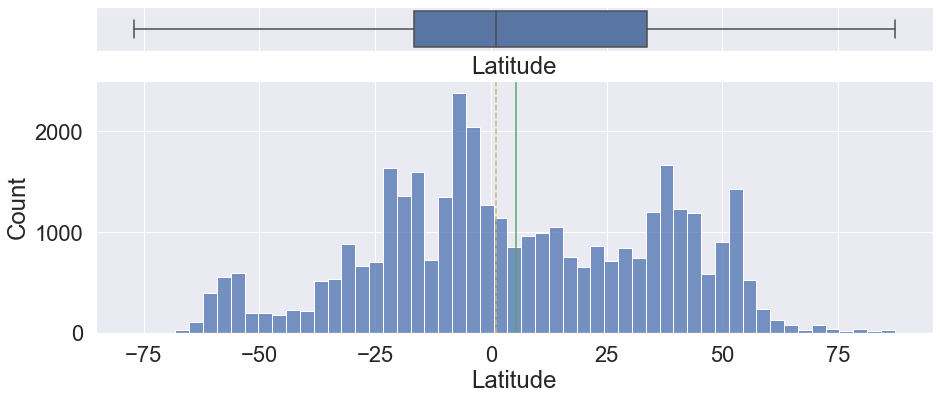

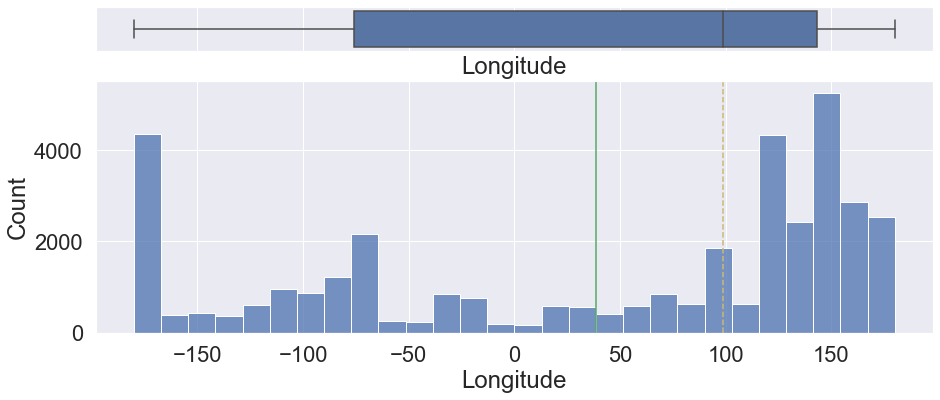

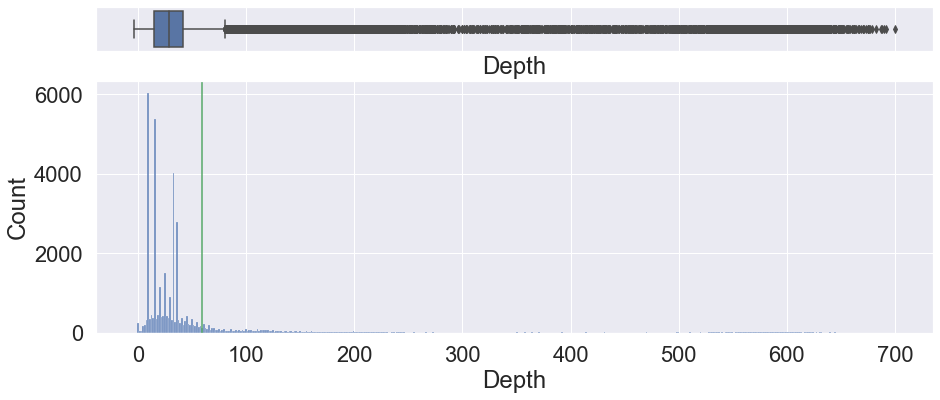

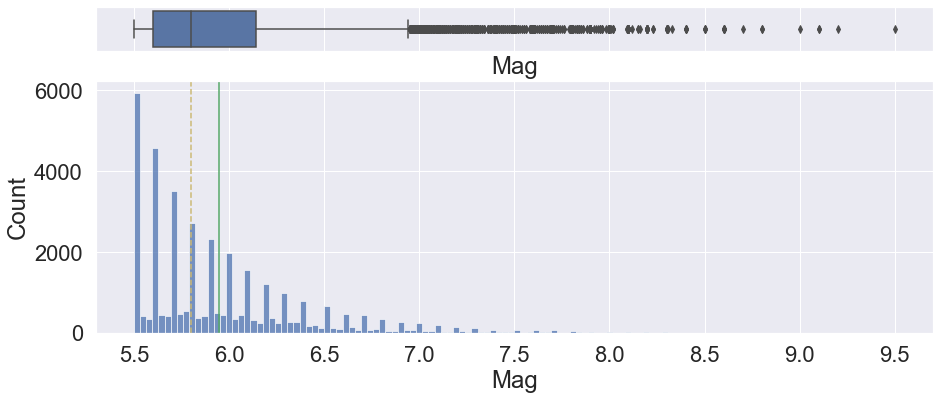

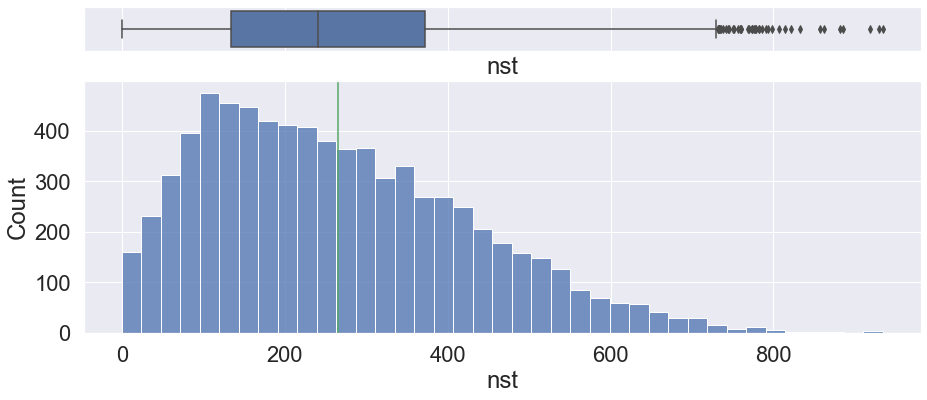

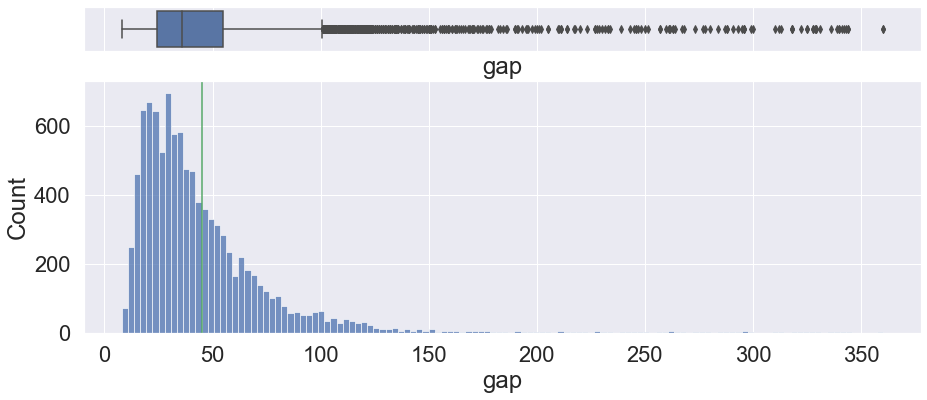

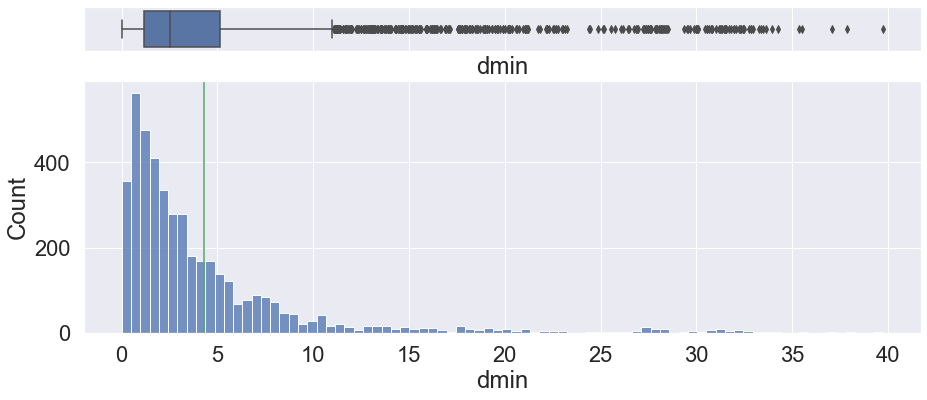

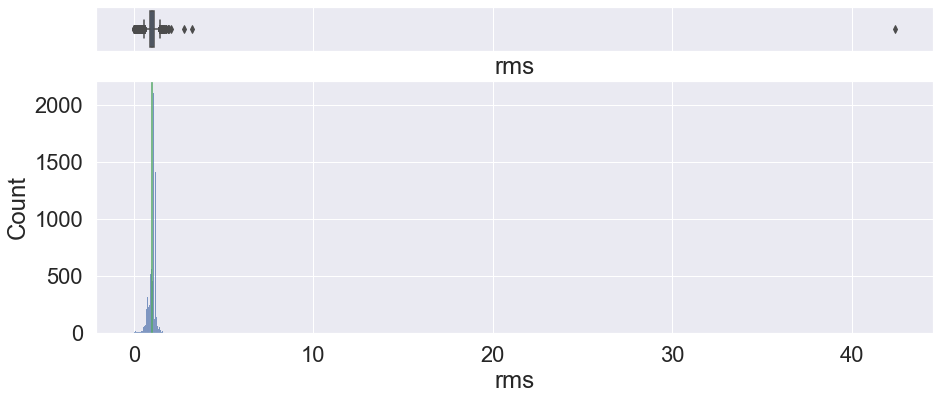

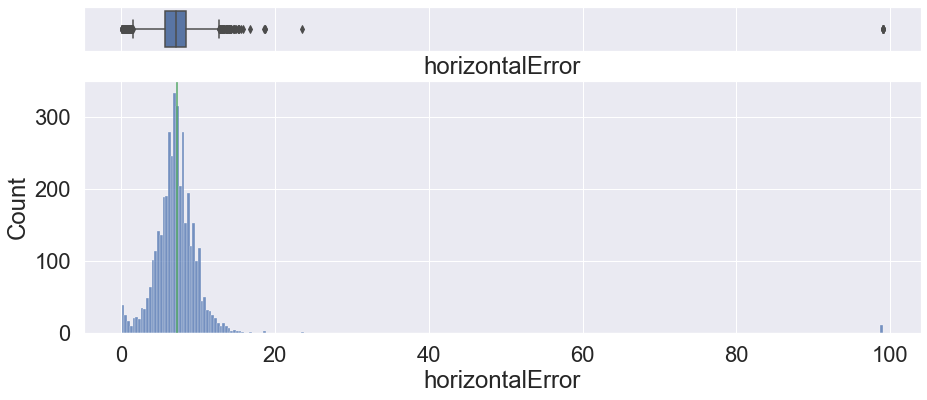

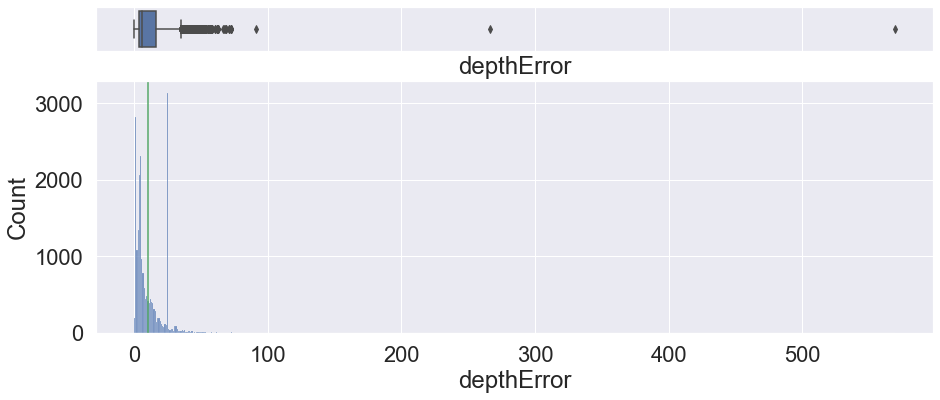

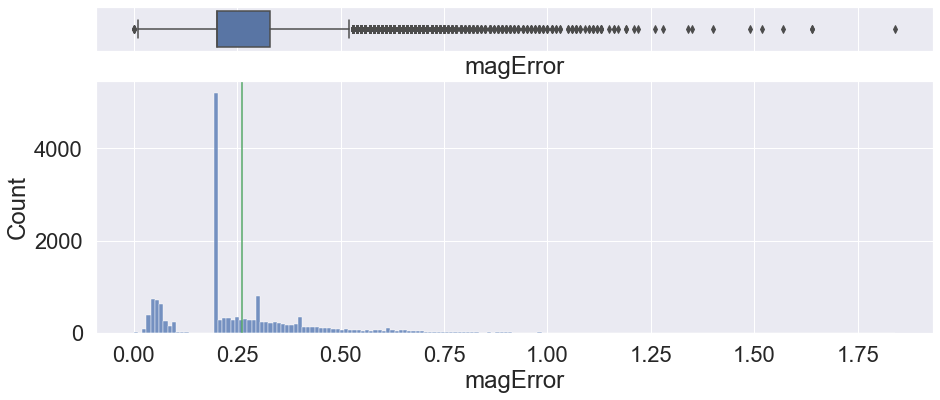

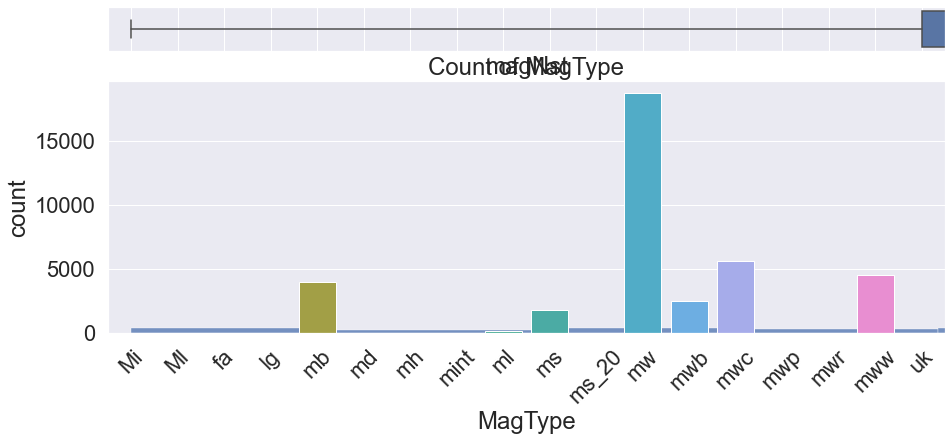

Plotting categorical column: net


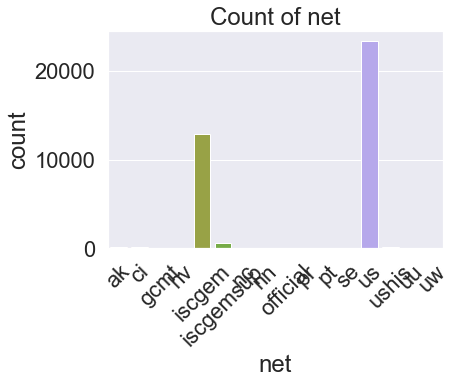

Plotting categorical column: Type


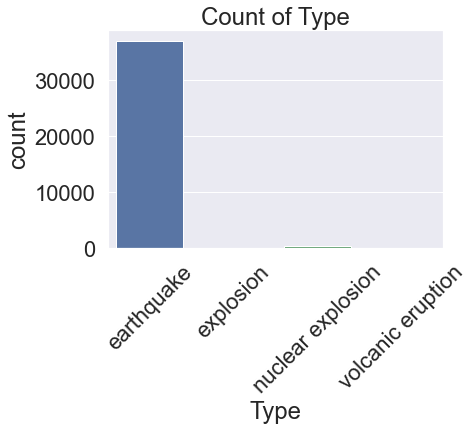

Plotting categorical column: status


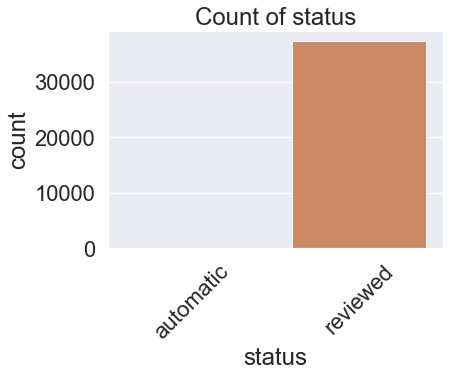

Plotting categorical column: locationSource


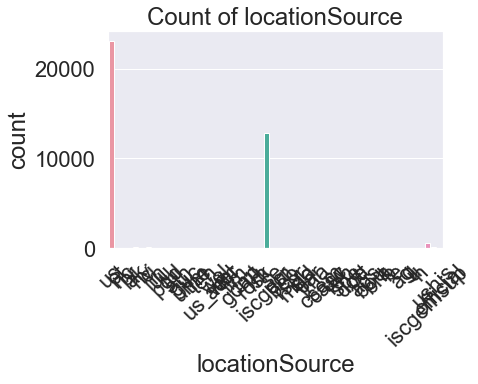

Plotting categorical column: magSource


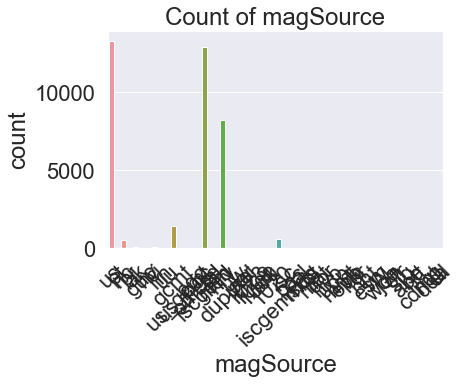

Plotting categorical column: country


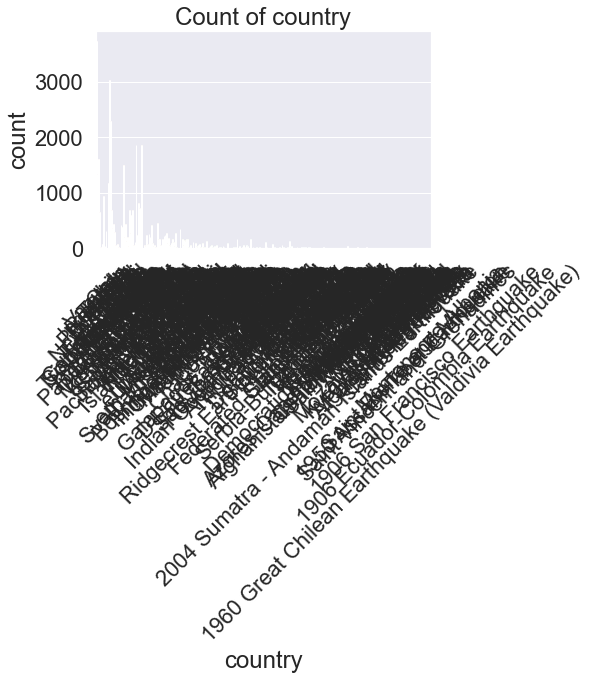

In [78]:
# Inspección gráfica de las variables

import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(15,6), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    figsize = 15,6
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")

def plot_categorical(col, figsize=(10,8)):
    print(f'Plotting categorical column: {col.name}')
    sns.countplot(x=col, data=df)
    plt.xlabel(col.name)
    plt.title(f'Count of {col.name}')
    plt.xticks(rotation=45)
    plt.show()

continuous_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Plot continuous variables
for col in continuous_cols:
    histogram_boxplot(df[col])

# Plot categorical variables
for col in categorical_cols:
    plot_categorical(df[col])

In [79]:
# Como en este dataset no hay muchas variables categóricas y los gráficos son demasiado densos como para 
#entenderlos a simple vista, voy a adaptar los gráficos para cada variable

# status
top_10 = df['status'].value_counts().head(10)
top_10 = pd.DataFrame({'status': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='status', y='Count', title='status ( Top 10 )')
fig.update_layout(width=700, height=300)  
fig.show()

In [80]:
# MagType
top_10 = df['magSource'].value_counts().head(10)
top_10 = pd.DataFrame({'magSource': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='magSource', y='Count', title='magSource ( Top 10 )')
fig.update_layout(width=700, height=300)  
fig.show()

In [81]:
# MagType
top_10 = df['locationSource'].value_counts().head(10)
top_10 = pd.DataFrame({'locationSource': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='locationSource', y='Count', title='locationSource ( Top 10 )')
fig.update_layout(width=700, height=300)  
fig.show()

In [82]:
# Como en este dataset no hay muchas variables categóricas y los gráficos son demasiado densos como para 
#entenderlos a simple vista, voy a adaptar los gráficos para cada variable

# MagType
top_10 = df['MagType'].value_counts().head(10)
top_10 = pd.DataFrame({'MagType': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='MagType', y='Count', title='MagTypes ( Top 10 )')
fig.update_layout(width=700, height=300)  
fig.show()

In [83]:
# net
top_10 = df['net'].value_counts().head(4)
top_10 = pd.DataFrame({'net': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='net', y='Count', title='net ( Top 3 )')
fig.update_layout(width=700, height=300)  
fig.show()

In [84]:
# type
top_10 = df['Type'].value_counts().head(3)
top_10 = pd.DataFrame({'Type': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='Type', y='Count', title='Type ( Top 3 )')
fig.update_layout(width=700, height=300)
fig.show()

In [85]:
# country
top_10 = df['country'].value_counts().head(10)
top_10 = pd.DataFrame({'country': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='country', y='Count', title='country ( Top 10 )')
fig.update_layout(width=700, height=300)  
fig.show()

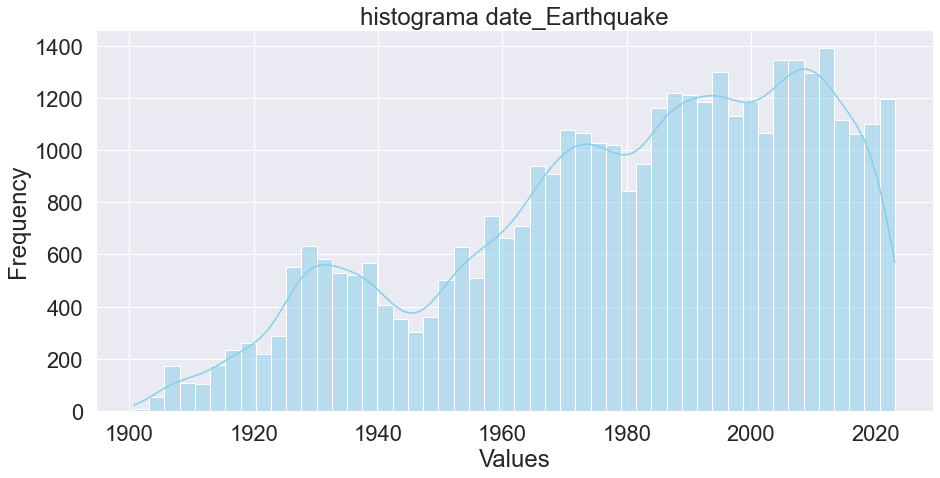

In [86]:
# date_earthquake
plt.figure(figsize=(15, 7))  

# Plot
sns.histplot(df['date_earthquake'], bins=50, kde=True, color='skyblue')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('histograma date_Earthquake')


plt.show()

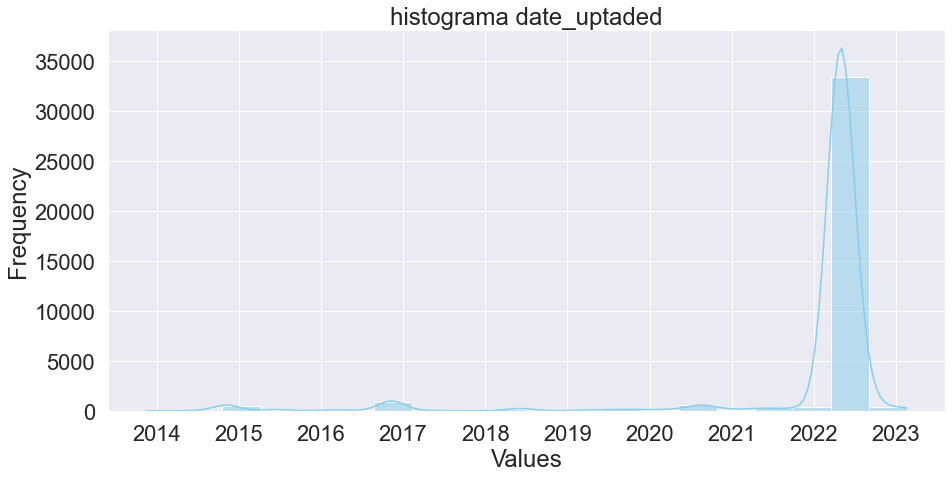

In [87]:
# date_updated

plt.figure(figsize=(15, 7))  

# Plot
sns.histplot(df['date_updated'], bins=20, kde=True, color='skyblue')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('histograma date_uptaded')

plt.show()

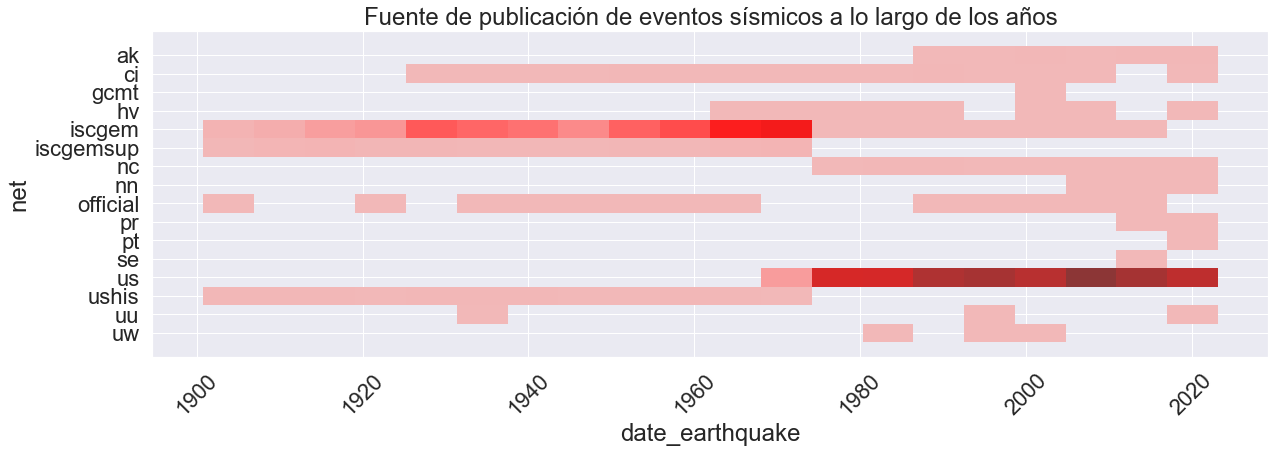

In [88]:
# net vs. date_earthquake

plt.figure(figsize=(20, 6))  
sns.histplot(x='date_earthquake', y='net', data=df, bins=20, kde=True, color='red')  
plt.xlabel('date_earthquake')
plt.ylabel('net')
plt.title('Fuente de publicación de eventos sísmicos a lo largo de los años')
plt.xticks(rotation=45)
plt.show()

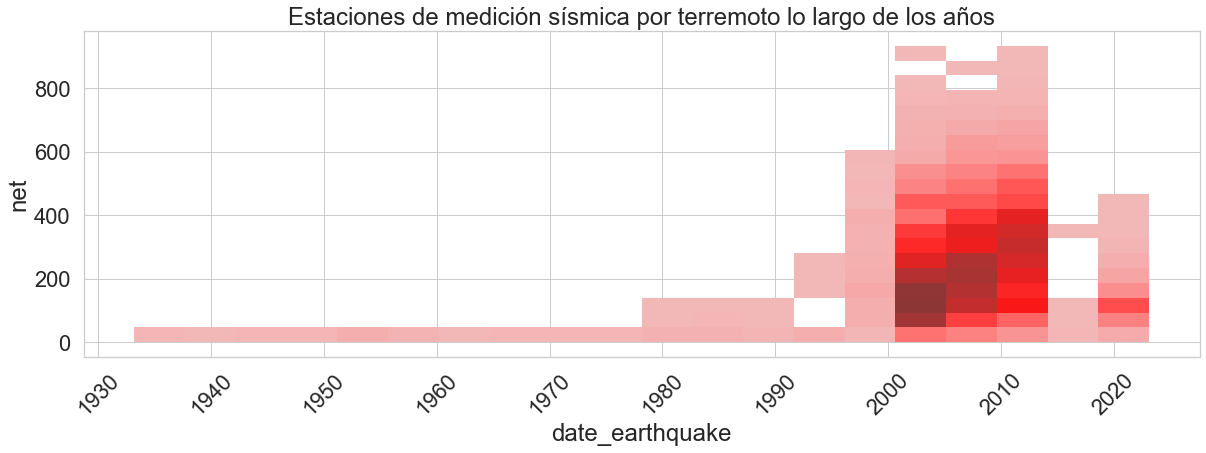

In [89]:
# nst vs. date_earthquake

sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))  
sns.histplot(x='date_earthquake', y='nst', data=df, bins=20, kde=True, color='red')  
plt.xlabel('date_earthquake')
plt.ylabel('net')
plt.title('Estaciones de medición sísmica por terremoto lo largo de los años')
plt.xticks(rotation=45)
plt.show()

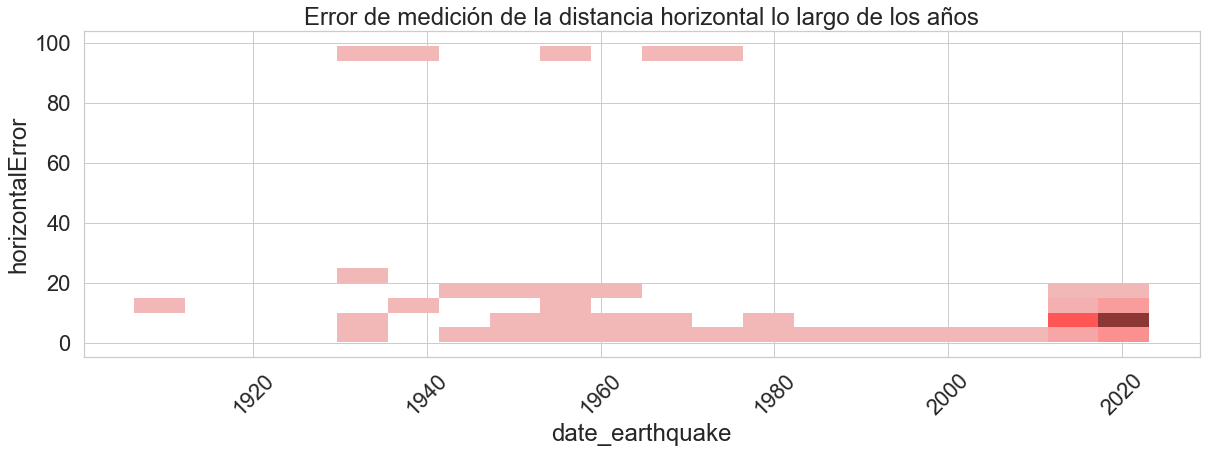

In [90]:
# horizontalError vs. date_earthquake

plt.figure(figsize=(20, 6))  
sns.histplot(x='date_earthquake', y='horizontalError', data=df, bins=20, kde=True, color='red')  
plt.xlabel('date_earthquake')
plt.ylabel('horizontalError')
plt.title('Error de medición de la distancia horizontal lo largo de los años')
plt.legend('')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Ubicación de terremotos ( Latitud + Longitud )
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Mag", 
                        mapbox_style="open-street-map", zoom = 1, color_continuous_scale = 'Reds')

fig.show()

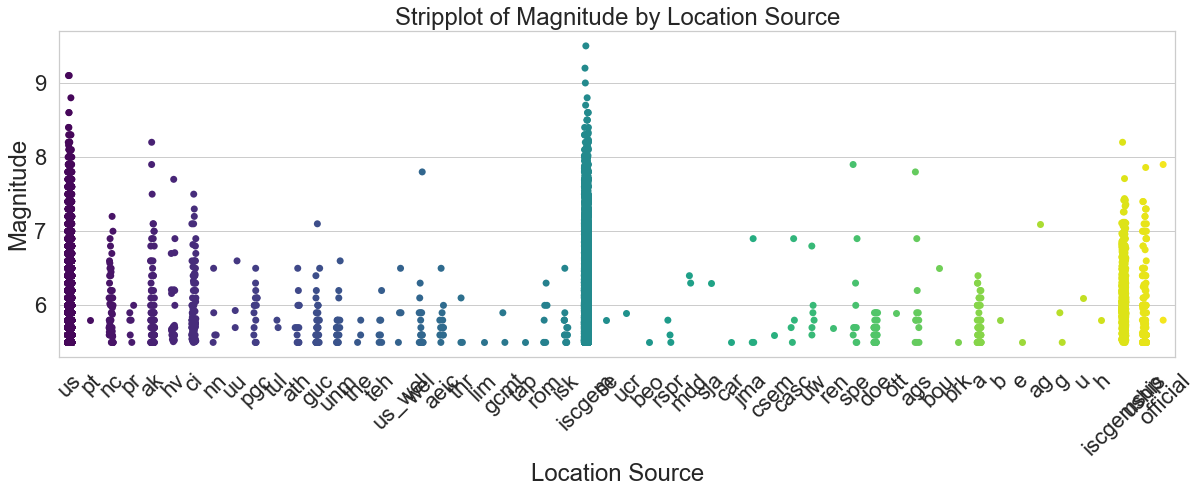

In [92]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='locationSource', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by Location Source')
plt.xticks(rotation=45)
plt.show()

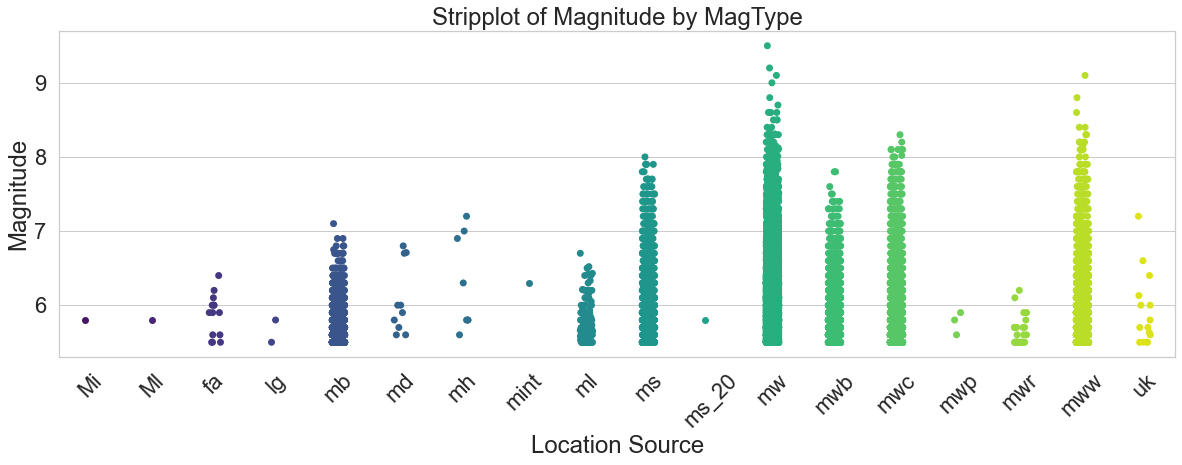

In [93]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='MagType', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by MagType')
plt.xticks(rotation=45)
plt.show()

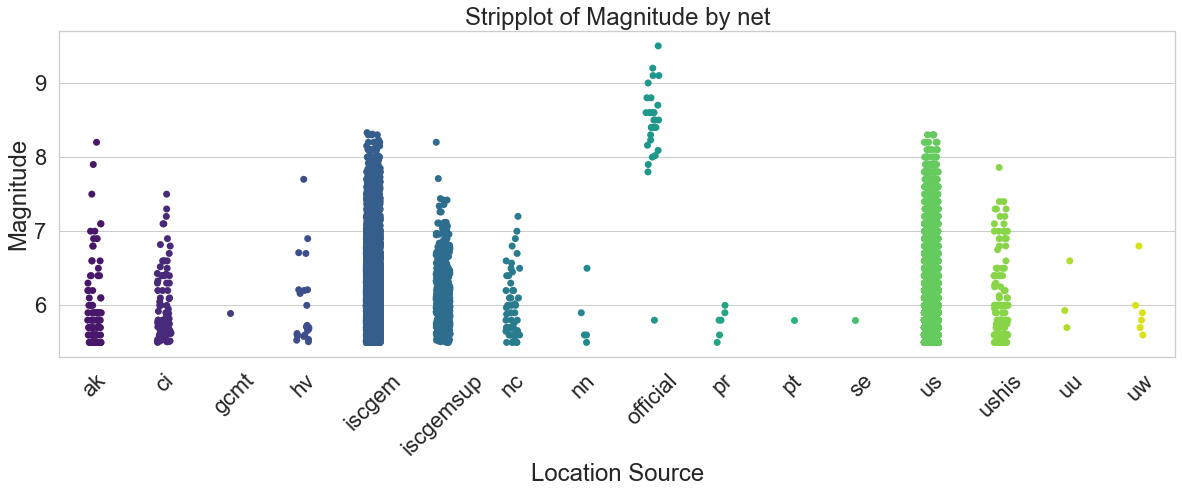

In [94]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='net', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by net')
plt.xticks(rotation=45)
plt.show()

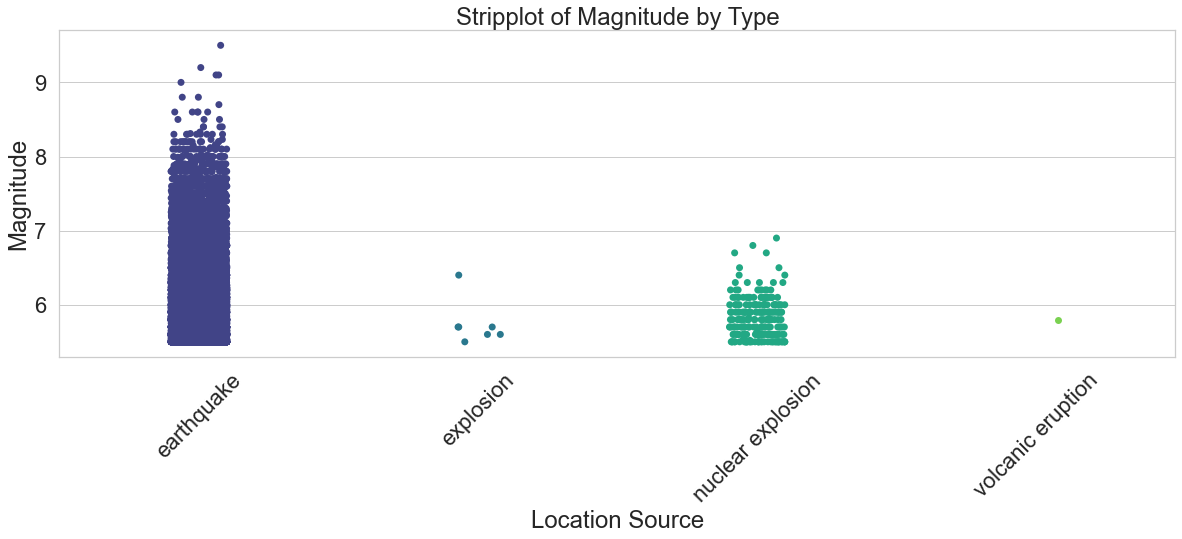

In [95]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='Type', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by Type')
plt.xticks(rotation=45)
plt.show()

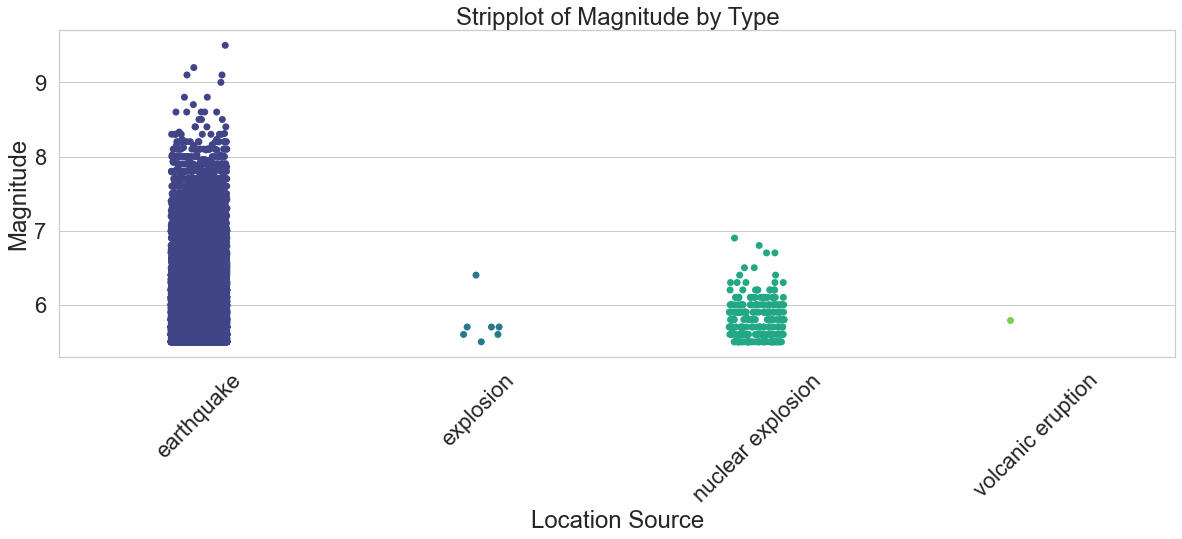

In [96]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='Type', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by Type')
plt.xticks(rotation=45)
plt.show()

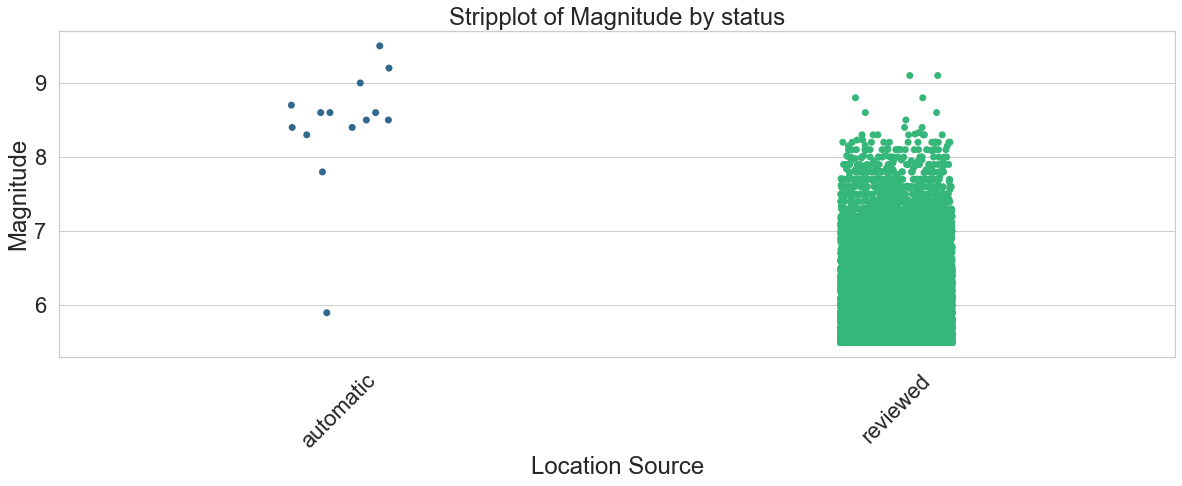

In [97]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='status', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by status')
plt.xticks(rotation=45)
plt.show()

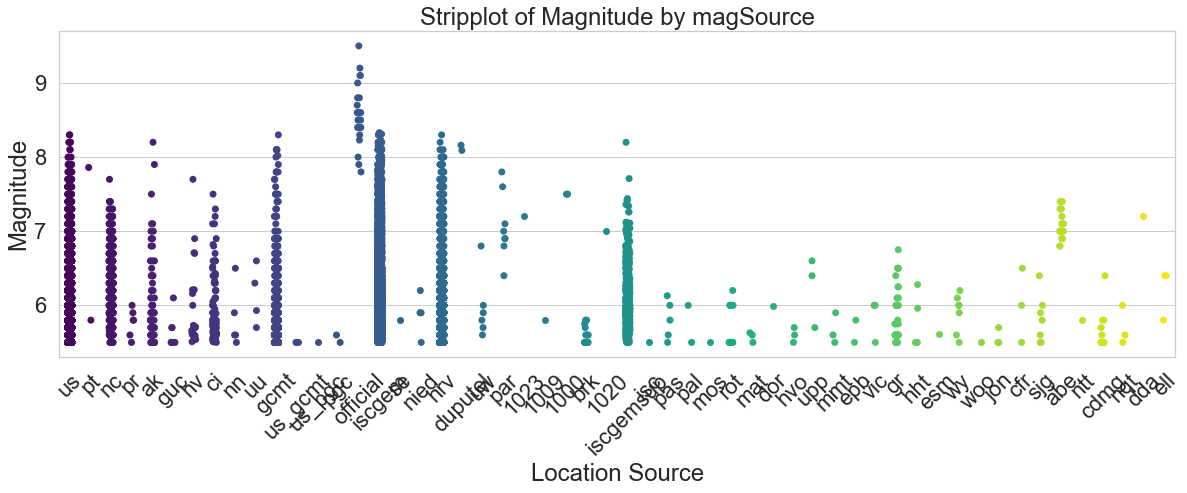

In [98]:
plt.figure(figsize=(20, 6))  
sns.stripplot(x='magSource', y='Mag', data=df, palette='viridis', size=7)  
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.title('Stripplot of Magnitude by magSource')
plt.xticks(rotation=45)
plt.show()

In [99]:
# Complementamos el análisis visual con el valor numérico de la simetría
df_num = df.select_dtypes(include=np.number).copy()
df_num.skew()

Latitude           -0.054264
Longitude          -0.591205
Depth               3.845282
Mag                 1.646315
nst                 0.647220
gap                 3.550854
dmin                2.956782
rms                77.245397
horizontalError    13.542217
depthError          8.600140
magError            1.504111
magNst              5.262359
dtype: float64

In [100]:
# Análisis de correlación de variables
df_num.corr()

Latitude  Longitude     Depth       Mag       nst       gap  \
Latitude         1.000000   0.160449 -0.106645  0.037792  0.401307  0.042729   
Longitude        0.160449   1.000000 -0.069279  0.037964  0.047136 -0.266335   
Depth           -0.106645  -0.069279  1.000000 -0.004719  0.175152 -0.170159   
Mag              0.037792   0.037964 -0.004719  1.000000  0.416276 -0.210433   
nst              0.401307   0.047136  0.175152  0.416276  1.000000 -0.418439   
gap              0.042729  -0.266335 -0.170159 -0.210433 -0.418439  1.000000   
dmin            -0.405154  -0.152766 -0.075751 -0.106318  0.029894  0.021131   
rms             -0.095694  -0.008069 -0.052815  0.041513 -0.037641  0.015204   
horizontalError -0.136386  -0.079377  0.056835 -0.064015 -0.127042  0.250913   
depthError       0.024599   0.031249 -0.135945  0.105616 -0.227013  0.392768   
magError         0.108162   0.067836 -0.059200  0.113593 -0.329893  0.346759   
magNst           0.224685   0.045962  0.004383  0.048950  0.716937 -0.142584   

                     dmin       rms  horizontalError  depthError  magError  \
Latitude        -0.405154 -0.095694        -0.136386    0.024599  0.108162   
Longitude       -0.152766 -0.008069        -0.079377    0.031249  0.067836   
Depth           -0.075751 -0.052815         0.056835   -0.135945 -0.059200   
Mag             -0.106318  0.041513        -0.064015    0.105616  0.113593   
nst              0.029894 -0.037641        -0.127042   -0.227013 -0.329893   
gap              0.021131  0.015204         0.250913    0.392768  0.346759   
dmin             1.000000 -0.011300         0.231048   -0.080540  0.124969   
rms             -0.011300  1.000000         0.279841    0.058025 -0.006200   
horizontalError  0.231048  0.279841         1.000000    0.341467  0.312445   
depthError      -0.080540  0.058025         0.341467    1.000000  0.255203   
magError         0.124969 -0.006200         0.312445    0.255203  1.000000   
magNst          -0.102402 -0.023896        -0.049678   -0.038381 -0.352568   

                   magNst  
Latitude         0.224685  
Longitude        0.045962  
Depth            0.004383  
Mag              0.048950  
nst              0.716937  
gap             -0.142584  
dmin            -0.102402  
rms             -0.023896  
horizontalError -0.049678  
depthError      -0.038381  
magError        -0.352568  
magNst           1.000000

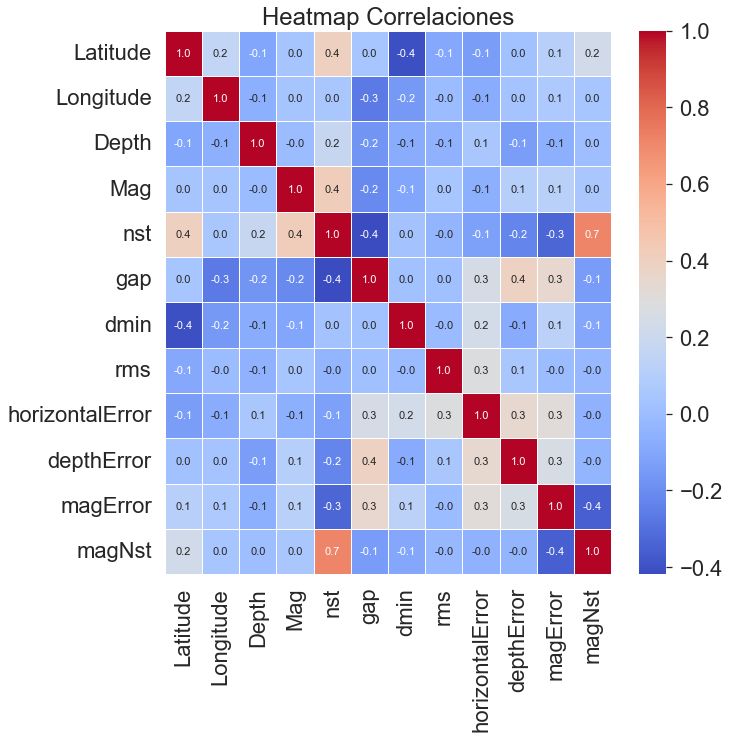

In [101]:
# Heatmap de correlaciones
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_num.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax, cmap='coolwarm', annot_kws={"size": 11})
plt.title("Heatmap Correlaciones")
plt.show()

#### 2. Valores atípicos

In [102]:
# Definición de función para winsorizar valores atípicos
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

                  ## Función para gestionar outliers
                  
def gestiona_outliers(col, clas='check'):
    print(col.name)
    if col.dtypes == 'float64':
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>8
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)



In [103]:
df_num.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Latitude
Longitude
Depth
Mag
nst
gap
dmin
rms
horizontalError
depthError
magError
magNst


Latitude  Longitude     Depth       Mag  nst       gap      dmin       rms  \
0       0.0        0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
1       0.0        0.0  3.099712  0.034824  0.0  0.763359  0.978385  0.014838   
2       0.0        0.0  3.099712  0.034824  0.0  0.763359  0.978385  0.014838   

   horizontalError  depthError  magError    magNst  
0         0.000000    0.000000  0.000000  0.000000  
1         0.277078    0.048015  0.090629  0.837677  
2         0.277078    0.048015  0.090629  0.837677

In [104]:
# Voy a pasar a NA el único valor que creo que puede tratarse de un error:
df.rms[df.rms>4] = np.nan

In [105]:
# Defino función de winsorización
def winsor_perc(df, cols, perc_low, perc_high):
    
    for col in cols:
        
         lower_bound = df[col].quantile(perc_low)
         upper_bound = df[col].quantile(1-perc_high)
        
         df[col] = np.where(df[col]>upper_bound, upper_bound,
                  np.where(df[col]<lower_bound, lower_bound, df[col]))

In [106]:
# Defino las columnas a winsorizar (Dejo fuera lat, lon y nst al no tener outliers)
cols_winsor = ['Depth','Mag','gap','dmin','rms','horizontalError','depthError','magError','magNst']

# Ejecuto la winsorización colapsando las colas al 1%
df_cont2 = df.select_dtypes(include=np.number).copy()
winsor_perc(df_cont2, cols_winsor , 0.01, 0.01)

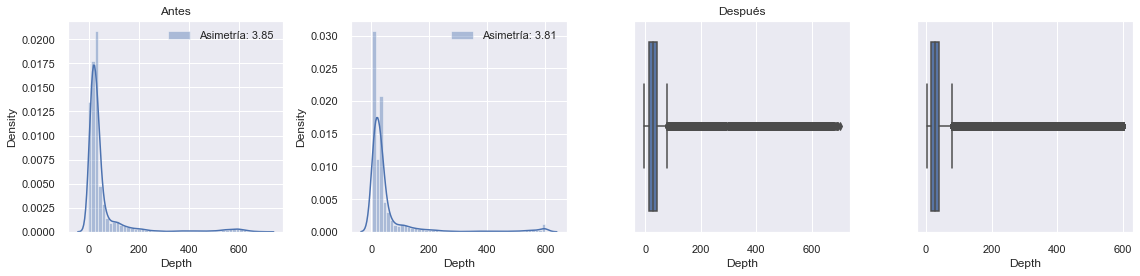

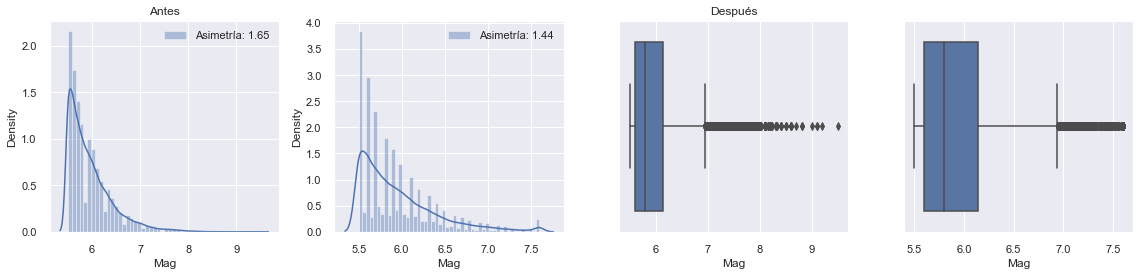

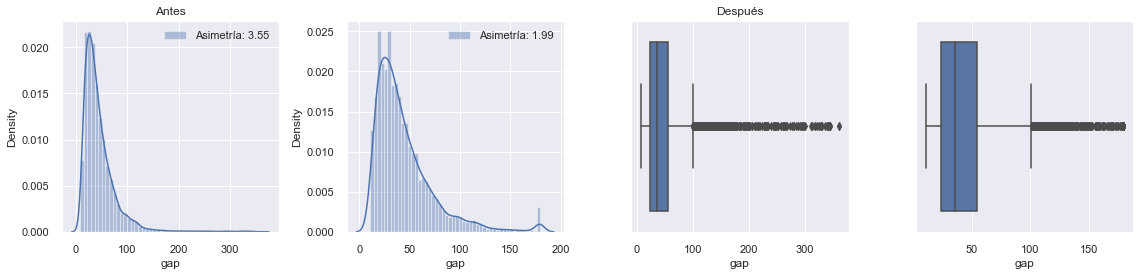

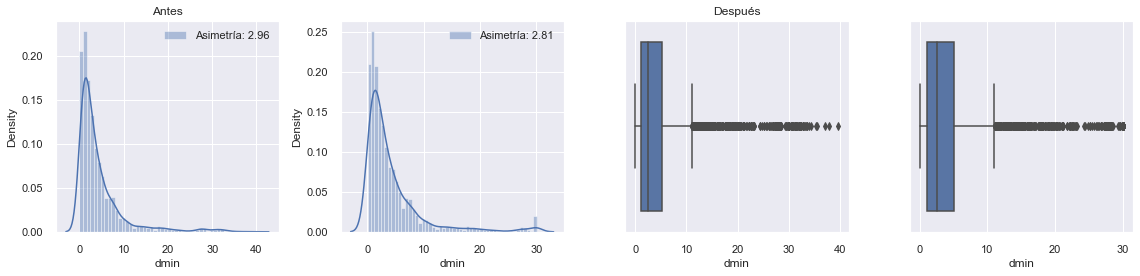

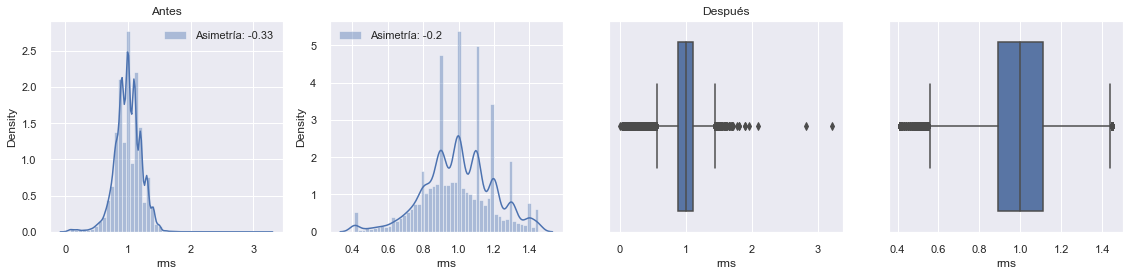

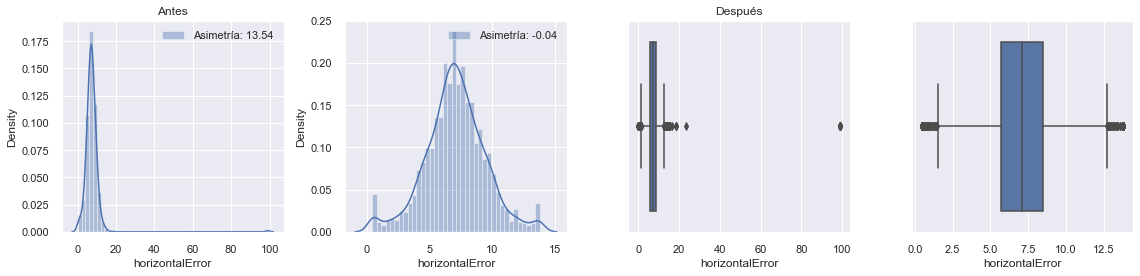

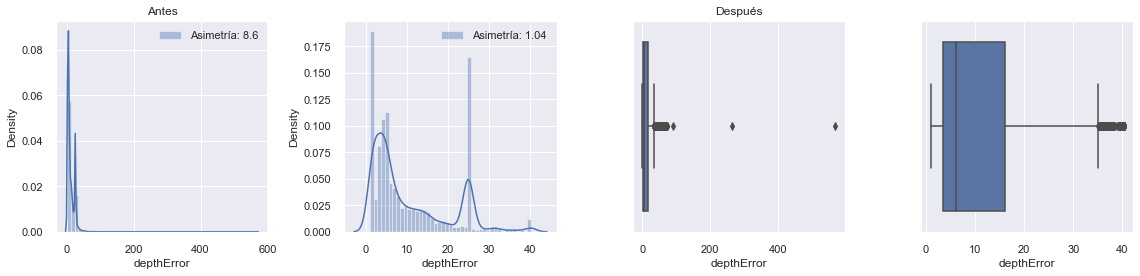

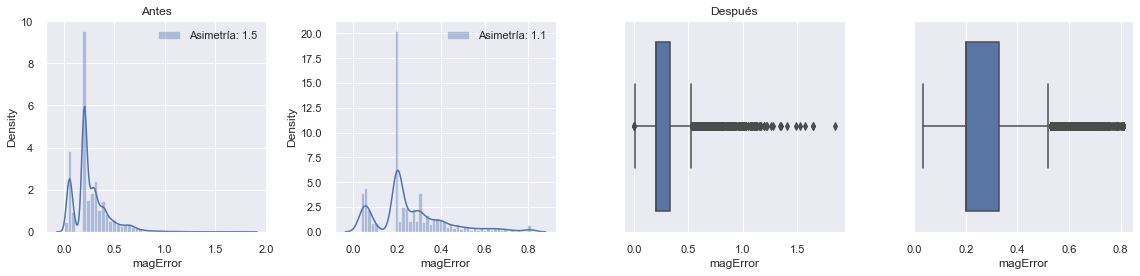

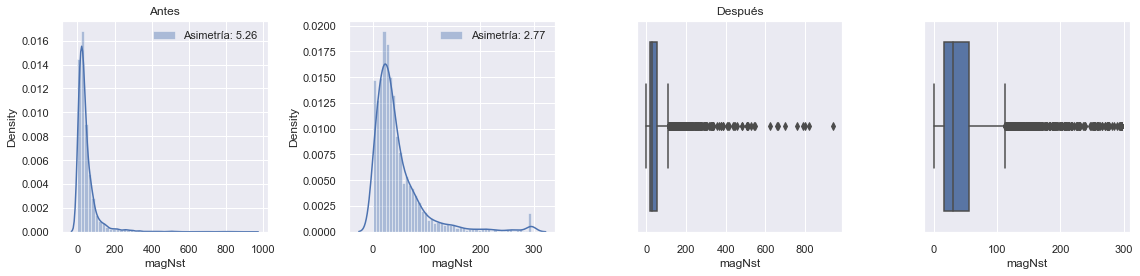

In [107]:
warnings.filterwarnings("ignore")

sns.set()

# Plot de gráficos antes/ después de la winsorización
for col in cols_winsor:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="Asimetría: " + str(np.round(df[col].skew(),2)))
    plt.title('Antes')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cont2[col], label="Asimetría: " + str(np.round(df_cont2[col].skew(),2)))
    plt.title(' ')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Después')
    
    plt.subplot(144)
    sns.boxplot(df_cont2[col])
    plt.title(' ')
    plt.tight_layout()
    plt.show()

In [108]:
# Volvemos a observar ahora la incidencia de outliers.
df_cont2.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Latitude
Longitude
Depth
Mag
nst
gap
dmin
rms
horizontalError
depthError
magError
magNst


Latitude  Longitude     Depth  Mag  nst  gap  dmin  rms  horizontalError  \
0       0.0        0.0  0.000000  0.0  0.0  0.0   0.0  0.0              0.0   
1       0.0        0.0  3.123908  0.0  0.0  0.0   0.0  0.0              0.0   
2       0.0        0.0  3.123908  0.0  0.0  0.0   0.0  0.0              0.0   

   depthError  magError    magNst  
0         0.0       0.0  0.000000  
1         0.0       0.0  1.098287  
2         0.0       0.0  1.098287

In [109]:
df_cat = df.select_dtypes(exclude=np.number)
df_winsor = df_cat.join(df_cont2)

#### 3. Valores perdidos

In [110]:
# Creo un DF para analizar el impacto de los missings
ms = df_winsor.isna().sum()
ms

MagType                0
net                    0
Type                   0
status                 0
locationSource         0
magSource              0
date_earthquake        0
date_updated           0
country              284
Latitude               0
Longitude              0
Depth                134
Mag                    0
nst                29858
gap                27244
dmin               32936
rms                17114
horizontalError    33361
depthError         16504
magError           20780
magNst             31959
dtype: int64

In [111]:
# Aíslo aquellas columnas afectadas por valores nulos, de forma que podamos entender mejor su incidencia.
ms_graf = ms[ms>0]

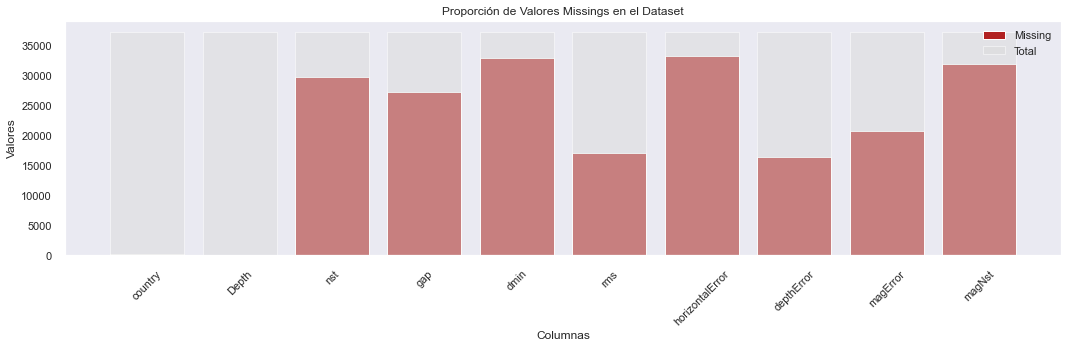

In [112]:
# Plot de datos missing

plt.figure(figsize=(15, 5))  # Set the figure size

# Barra valores missings
plt.bar(ms_graf.index, ms_graf.values, color='firebrick', label='Missing')

# Barrra valores totales
total_rows = len(df)
plt.bar(ms_graf.index, [total_rows] * len(ms_graf), color='gainsboro', alpha=0.5, label='Total')

plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Proporción de Valores Missings en el Dataset')
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)


plt.tight_layout()
plt.show()

<AxesSubplot: >

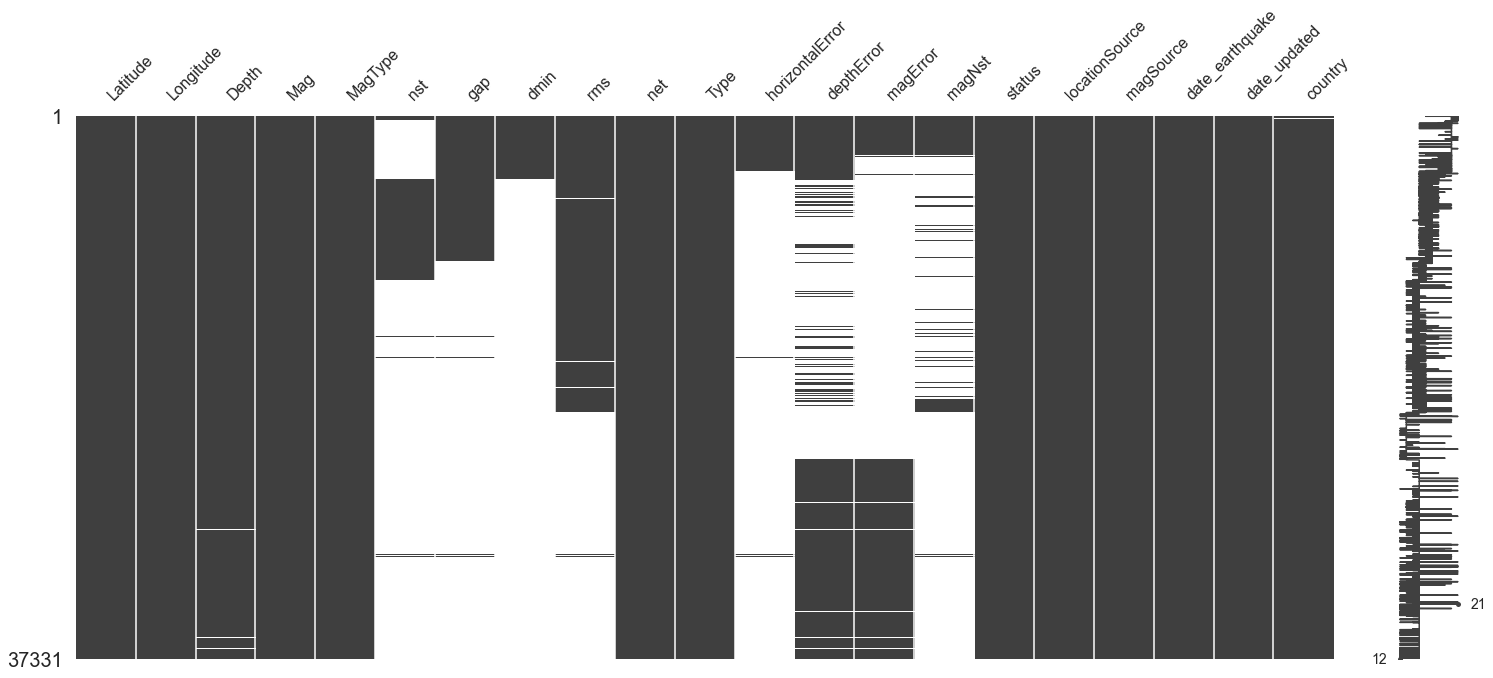

In [113]:
# Gráfico de patrones de correlación de missings ordenados por índice

msno.matrix(df.sort_index())


<AxesSubplot: >

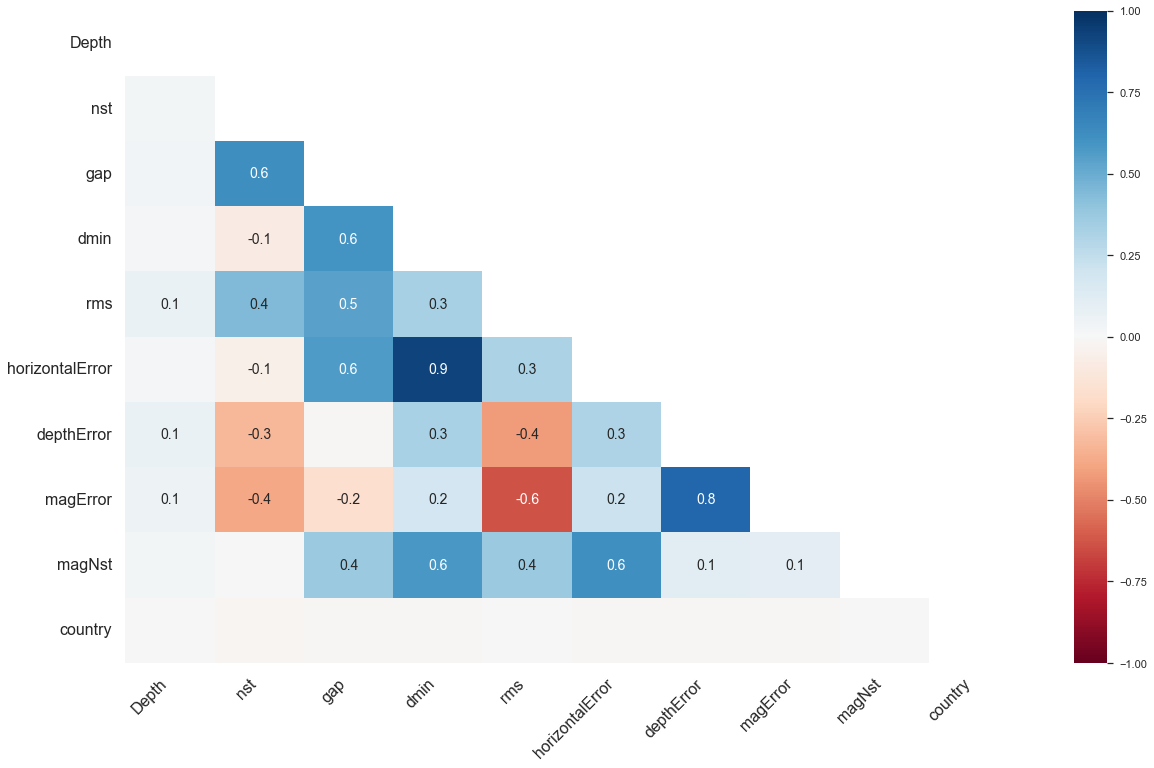

In [114]:
# Gráfico heatmap para comprobar niveles de correlación de missings entre variables
msno.heatmap(df)

In [115]:
# Cálculo del porcentaje de los valores nulos.
ms_pct = df_winsor.isna().sum()/len(df)*100
ms_pct

MagType             0.000000
net                 0.000000
Type                0.000000
status              0.000000
locationSource      0.000000
magSource           0.000000
date_earthquake     0.000000
date_updated        0.000000
country             0.760762
Latitude            0.000000
Longitude           0.000000
Depth               0.358951
Mag                 0.000000
nst                79.981785
gap                72.979561
dmin               88.226943
rms                45.843937
horizontalError    89.365407
depthError         44.209906
magError           55.664193
magNst             85.609815
dtype: float64

In [116]:
# Elimino las variables que tienen demasiados datos missing como para poder imputar sus valores
df_winsor.drop(columns=['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst', 'rms', 'depthError'], inplace = True)

In [117]:
# Separo entre categóricas y numéricas para así poder realizar imputaciones
input_cont = df_winsor.select_dtypes(include=np.number)
input_cat = df_winsor.select_dtypes(exclude=np.number)

In [118]:
# Defino el imputador KNN para los 3 vecinos más próximos. La utilizaré con las variables numéricas. 
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

In [119]:
# Aplicamos método de imputación de los knn vecinos más próximos para la variable Depth
input_knn = pd.DataFrame(imputer_knn.fit_transform(input_cont),columns=input_cont.columns)

API de Geopy a-> Código utilizado par reconstruir los valores nulos de la varible no numérica 'country' a través de las coordenadas. Muchas de las coordenadas, se producen fuera de los límites de los países, en los mares, por lo que la API no devuelve todos los valores y no funciona bien. Dejo el código, que finalmente no he implementado en la versión final. 

from geopy.point import Point

geolocator = Nominatim(user_agent="thesis_earthquake")

for index, row in df_winsor.iterrows():
    if pd.isna(row['country']):
        lat = row['Latitude']
        lon = row['Longitude']

        location = Point(lat, lon)

        # ReverseGeocoding a través de latitud y longitud
        localizacion = geolocator.reverse(location, exactly_one=True)

        # En caso de que no encuentre ubicación, devuelve valor 'Unknown'
        if localizacion is not None:
            # Update the 'country' column with the country name
            df_winsor.at[index, 'country'] = localizacion.raw['address']['country']
        else:
            # Handle cases where reverse geocoding doesn't return a valid result
            df_winsor.at[index, 'country'] = 'Unknown'

In [120]:
# Borrado de la variable 'country' al no poder imputar los missings y tener ya información de la localización a través de la latitud y longitud

input_cat.drop(columns = 'country', inplace=True)

In [121]:
df_clean = input_knn.join(input_cat)

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Latitude         37331 non-null  float64       
 1   Longitude        37331 non-null  float64       
 2   Depth            37331 non-null  float64       
 3   Mag              37331 non-null  float64       
 4   MagType          37331 non-null  category      
 5   net              37331 non-null  category      
 6   Type             37331 non-null  category      
 7   status           37331 non-null  category      
 8   locationSource   37331 non-null  object        
 9   magSource        37331 non-null  object        
 10  date_earthquake  37331 non-null  datetime64[ns]
 11  date_updated     37331 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), float64(4), object(2)
memory usage: 2.4+ MB


In [123]:
df_clean.to_csv('df_clean.csv', index=False)

### CAPITULO 3: Transformación de variables

In [124]:
# Importo el dataset limpio
df = pd.read_csv('df_clean.csv', index_col = False)

In [125]:
# Comprobamos el dataset está en orden
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         37331 non-null  float64
 1   Longitude        37331 non-null  float64
 2   Depth            37331 non-null  float64
 3   Mag              37331 non-null  float64
 4   MagType          37331 non-null  object 
 5   net              37331 non-null  object 
 6   Type             37331 non-null  object 
 7   status           37331 non-null  object 
 8   locationSource   37331 non-null  object 
 9   magSource        37331 non-null  object 
 10  date_earthquake  37331 non-null  object 
 11  date_updated     37331 non-null  object 
dtypes: float64(4), object(8)
memory usage: 3.4+ MB


In [126]:
# Volvemos a pasar a categóricas las variables que habíamos detectado antes.
to_factor = list(df.loc[:,df.nunique() < 20]);  

# Transformación de variables a tipo categórico
df[to_factor] = df[to_factor].astype('category')

print(f'Columnas transformadas: {to_factor}')

Columnas transformadas: ['MagType', 'net', 'Type', 'status']


In [127]:
# Transformo las columnas a fecha de date_earthquake y date_updated

df['date_earthquake'] = pd.to_datetime(df['date_earthquake'])
df['date_updated'] = pd.to_datetime(df['date_updated'])

#### 1. Análisis de información tras limpieza de variables

In [50]:
# Uso de pandas_profiling para repaso de información del DF con los datos tratados
import pandas_profiling
pandas_profiling.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [128]:
# Tras dar un repaso al PandasProfilling Report, decido investigar las correlaciones de algunas variables categóricas a través de V de Crammer

# Tabla de contingencia V Crammer
def v_crammer_categoricas(col1, col2):
    contingency_table = pd.crosstab(col1, col2)
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = df.shape[0]  # Sample size
    min_dim = min(contingency_table.shape) - 1  # Number of categories minus 1
    cramer_v = (chi2 / (n * min_dim))**0.5

    # Print Cramer's V
    print(f"Cramer's V {col1.name} - {col2.name} : {cramer_v}")


v_crammer_categoricas(df.net, df.locationSource)
v_crammer_categoricas(df.net, df.magSource)
v_crammer_categoricas(df.locationSource, df.magSource)
v_crammer_categoricas(df.status, df.magSource)

Cramer's V net - locationSource : 0.9491135277103849
Cramer's V net - magSource : 0.9001600651008957
Cramer's V locationSource - magSource : 0.48207604644873536
Cramer's V status - magSource : 0.6947755237524089


In [129]:
# Decido eliminar net, ya que es una combinación lineal de locationSource y magSource 
df.drop(columns=['net'], axis=1, inplace = True)

#### 3. Transformación de variables numéricas

In [130]:
# Separo el dataset original en target y variables imput
target = df.Mag
imput = df.drop(['Mag'],axis=1)

In [131]:
# Función para calcular VCramer
def cramers_v(var1, varObj):
    
    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)
        
    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer


# Función para transfromación de variables input que maximiza  VCramer o la correlación tipo Pearson con la variable target
def mejorTransf (vv,target, name=False, tipo = 'cramer', graf=False):
    
    # Escalado de datos 
    vv = pd.Series(scale(vv), name=vv.name)
    # Traslación a valores positivos de la variable 
    vv = vv + abs(min(vv))+0.0001
      
    # Definimos y calculamos las transformaciones típicas  
    transf = pd.DataFrame({vv.name + '_ident': vv, vv.name + '_log': np.log(vv), vv.name + '_exp': np.exp(vv), vv.name + '_sqrt': np.sqrt(vv), 
                         vv.name + '_sqr': np.square(vv), vv.name + '_cuarta': vv**4, vv.name + '_raiz4': vv**(1/4)})
      
    # Distinguimos caso VCramer o caso Correlación
    if tipo == 'cramer':
      # Aplicar la función cramers_v a cada transformación frente a la Target
      tablaCramer = pd.DataFrame(transf.apply(lambda x: cramers_v(x,target)),columns=['VCramer'])
      
      # Si queremos gráfico, muestra comparativa entre las posibilidades
      if graf: px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a ' + target.name).update_yaxes(categoryorder="total ascending").show()
      # Identificar mejor transformación
      best = tablaCramer.query('VCramer == VCramer.max()').index
      ser = transf[best[0]].squeeze()
    
    if tipo == 'cor':
      # Aplicar coeficiente de correlación a cada transformación frente a la target
      tablaCorr = pd.DataFrame(transf.apply(lambda x: np.corrcoef(x,target)[0,1]),columns=['Corr'])
      # Si queremos gráfico, muestra comparativa entre las posibilidades
      if graf: px.bar(tablaCorr,x=tablaCorr.Corr,title='Reblaciones frente a ' + target.name).update_yaxes(categoryorder="total ascending").show()
      # identificar mejor transformación
      best = tablaCorr.query('Corr.abs() == Corr.abs().max()').index
      ser = transf[best[0]].squeeze()
  
    # Aquí distingue si se devuelve la variable transformada o solamente el nombre de la transformación
    if name:
      return(ser.name)
    else:
      return(ser)


In [132]:
# Aplicación de Transformación Tipo Correlación
transf_cor = imput.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,target, tipo='cor'))
transf_cor_names = imput.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,target,tipo='cor', name=True))
transf_cor.columns = transf_cor_names.values
transf_cor.index

# Aplicación de Transformación Tipo Cramer
transf_cramer = imput.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,target, tipo='cramer'))
transf_cramer_names = imput.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,target,tipo='cramer', name=True))
transf_cramer.columns = transf_cor_names.values
transf_cramer.index

RangeIndex(start=0, stop=37331, step=1)

In [133]:
# Adaptamos el nombre de las variables para indicar que son de VCramer y borramos las transformaciones de los aleatorios
mapeo_cramer = {'Latitude_log': 'Latitude_log_cr', 'Longitude_cuarta': 'Longitude_cuarta_cr', 'Depth_sqrt': 'Depth_sqrt_cr'}
transf_cramer.rename(columns = mapeo_cramer, inplace=True)


In [134]:
# Adaptamos el nombre de las variables para indicar que son de Correlación y borramos las transformaciones de los aleatorios
mapeo_cor = {'Latitude_log': 'Latitude_log_co', 'Longitude_cuarta': 'Longitude_cuarta_co', 'Depth_sqrt': 'Depth_sqrt_co'}
transf_cor.rename(columns = mapeo_cor, inplace=True)

#### 4. Transformación de variables categóricas

In [135]:
transf_cat = imput.select_dtypes(exclude=['number', 'datetime'])

In [136]:
# Agrupación de variables categóricas y objeto para evitar categorías minoritarias

# Cambio los tipos nuclear explosion, explosion y volcanic eruption por OSA (Other Seismic Activities)
#imput['Type'].replace({'nuclear explosion': 'OSA', 'explosion': 'OSA', 'volcanic eruption': 'OSA'})
transf_cat['Type_tr'] = imput['Type'].apply(lambda x: 'OSA' if x not in ['earthquake'] else x)

# Cambio los tipos de MagType menos representativos por OMT (Other Mag Types)
transf_cat['MagType_tr'] = imput['MagType'].apply(lambda x: 'OMT' if x not in ['mw'] else x)

# Cambio los tipos de magSource menos representativos por OMS (Other Mag Sources)
transf_cat['magSource_tr'] = imput['magSource'].apply(lambda x: 'OMS' if x not in ['us','iscgem'] else x)

# Cambio los tipos de locationSource menos representativos por OLS (Other Location Sources)
transf_cat['locationSource_tr'] = imput['locationSource'].apply(lambda x: 'OLS' if x not in ['us','iscgem'] else x)

In [137]:
# Boxplot de las transformaciones categóricas

top_10 = transf_cat['magSource_tr'].value_counts().head(10)
top_10 = pd.DataFrame({'magSource_tr': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='magSource_tr', y='Count', title='magSource_tr')
fig.update_layout(width=700, height=300)  
fig.show()

top_10 = transf_cat['MagType_tr'].value_counts().head(10)
top_10 = pd.DataFrame({'MagType_tr': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='MagType_tr', y='Count', title='MagType_tr')
fig.update_layout(width=700, height=300)  
fig.show()


In [138]:
# Concateno todas las variables en un único DF de transformaciones
df_originales = imput[['Latitude', 'Longitude', 'Depth']]
df_transf = pd.concat([transf_cat, transf_cor, transf_cramer, df_originales], axis=1)

In [139]:
df_transf

MagType        Type    status locationSource magSource     Type_tr  \
0         mww  earthquake  reviewed             us        us  earthquake   
1         mww  earthquake  reviewed             us        us  earthquake   
2         mww  earthquake  reviewed             us        us  earthquake   
3         mww  earthquake  reviewed             us        us  earthquake   
4         mww  earthquake  reviewed             us        us  earthquake   
...       ...         ...       ...            ...       ...         ...   
37326      ms  earthquake  reviewed          ushis       abe  earthquake   
37327      ms  earthquake  reviewed          ushis       abe  earthquake   
37328      ms  earthquake  reviewed          ushis       abe  earthquake   
37329      ms  earthquake  reviewed          ushis       ell  earthquake   
37330      mw  earthquake  reviewed          ushis        pt  earthquake   

      MagType_tr magSource_tr locationSource_tr  Latitude_log_co  \
0            OMT           us                us         0.828222   
1            OMT           us                us         0.699833   
2            OMT           us                us         1.066027   
3            OMT           us                us         0.171143   
4            OMT           us                us         1.378453   
...          ...          ...               ...              ...   
37326        OMT          OMS               OLS         1.436225   
37327        OMT          OMS               OLS         1.429016   
37328        OMT          OMS               OLS         1.433285   
37329        OMT          OMS               OLS         1.300952   
37330         mw          OMS               OLS         1.471960   

       Longitude_cuarta_co  Depth_sqrt_co  Latitude_log_cr  \
0                41.325105       0.563473         9.867478   
1                63.187427       0.541833         7.488853   
2                37.145123       0.382290        18.243690   
3                68.861577       0.804821         3.276123   
4                 7.425166       0.229873        52.918704   
...                    ...            ...              ...   
37326             0.000108       0.437694        67.006697   
37327             0.000028       0.414542        65.013008   
37328             0.000698       0.314780        66.184789   
37329             0.054633       0.182925        39.361629   
37330             0.002158       0.561156        78.082600   

       Longitude_cuarta_cr  Depth_sqrt_cr  Latitude  Longitude      Depth  
0                 2.535441      -1.147273   -6.5986   132.0763  38.615000  
1                 2.819406      -1.225593  -15.0912   167.0294  36.029000  
2                 2.468741      -1.923154   12.3238   123.8662  20.088000  
3                 2.880675      -0.434271  -40.5465   174.5709  74.320000  
4                 1.650732      -2.940459   45.1126    23.1781  10.000000  
...                    ...            ...       ...        ...        ...  
37326             0.102034      -1.652469   52.3800  -167.4500  25.000000  
37327             0.073031      -1.761161   51.4500  -171.0200  22.866667  
37328             0.162559      -2.311763   52.0000  -160.0000  15.000000  
37329             0.483465      -3.397353   36.0000  -120.5000   7.904667  
37330             0.215529      -1.155512   57.0900  -153.4800  38.333333  

[37331 rows x 18 columns]

In [140]:
# Volvemos a pasar a categóricas las variables que habíamos detectado antes.
to_factor = list(df_transf.loc[:,df_transf.nunique() < 20]);  

# Transformación de variables a tipo categórico
df_transf[to_factor] = df_transf[to_factor].astype('category')

print(f'Columnas transformadas: {to_factor}')

Columnas transformadas: ['MagType', 'Type', 'status', 'Type_tr', 'MagType_tr', 'magSource_tr', 'locationSource_tr']


#### 5. Análisis final de relación a través de VCrammer

In [141]:
# Elimino las variables objeto para poder pasárselas ahora como parámetro a VCrammer
df_transf.drop(columns=['locationSource', 'magSource'], axis=1, inplace = True)

# Incorporo también las fechas date_earthquake y date_updated
df_fechas = imput.select_dtypes(include='datetime64')
df_transf = df_transf.join(df_fechas, on=None)


In [142]:
# Creo dos variables aleatorias para hacer un punto de corte
df_transf['aleatorio'] = np.random.uniform(0,1,size=df.shape[0])
df_transf['aleatorio2'] = np.random.uniform(0,1,size=df.shape[0])

In [143]:
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(df_transf.apply(lambda x: cramers_v(x,target)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
fig = px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a Magnitud').update_yaxes(categoryorder="total ascending")
fig.update_layout(width=800, height=800)

fig.show()

In [144]:
# Gráfica de correlaciones de variables para comprobar si la correlación con respecto a la target aumenta tras las transformaciones
df_corr = df_transf.join(target)
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

In [145]:
# Guardado final de mejores variables en un DF final
# Me quedo con las variables categóricas transformadas, por lo que hago drop de las originales y de los aleatorios
df_transf_def = df_transf.drop(columns= ['MagType', 'Type', 'aleatorio', 'aleatorio2'], axis=1)

# Me quedo con Depth_sqrt_cr, por lo que hago drop de la original y la Depth_sqrt_co
df_transf_def.drop(columns= ['Depth_sqrt_co', 'Depth'], axis=1, inplace = True)

# Me quedo con Longitude_cuarta_cr, por lo que hago drop de la original y de Latitude_log_co
df_transf_def.drop(columns= ['Latitude_log_co', 'Latitude'], axis=1, inplace = True)

# Me quedo con Longitude original, por lo que hago drop de las transformadas
df_transf_def.drop(columns= ['Longitude_cuarta_cr', 'Longitude_cuarta_co'], axis=1, inplace = True)

In [146]:
df_transf_def

status     Type_tr MagType_tr magSource_tr locationSource_tr  \
0      reviewed  earthquake        OMT           us                us   
1      reviewed  earthquake        OMT           us                us   
2      reviewed  earthquake        OMT           us                us   
3      reviewed  earthquake        OMT           us                us   
4      reviewed  earthquake        OMT           us                us   
...         ...         ...        ...          ...               ...   
37326  reviewed  earthquake        OMT          OMS               OLS   
37327  reviewed  earthquake        OMT          OMS               OLS   
37328  reviewed  earthquake        OMT          OMS               OLS   
37329  reviewed  earthquake        OMT          OMS               OLS   
37330  reviewed  earthquake         mw          OMS               OLS   

       Latitude_log_cr  Depth_sqrt_cr  Longitude     date_earthquake  \
0             9.867478      -1.147273   132.0763 2023-02-17 09:00:00   
1             7.488853      -1.225593   167.0294 2023-02-16 05:00:00   
2            18.243690      -1.923154   123.8662 2023-02-15 18:00:00   
3             3.276123      -0.434271   174.5709 2023-02-15 06:00:00   
4            52.918704      -2.940459    23.1781 2023-02-14 13:00:00   
...                ...            ...        ...                 ...   
37326        67.006697      -1.652469  -167.4500 1902-01-01 05:00:00   
37327        65.013008      -1.761161  -171.0200 1901-12-31 09:00:00   
37328        66.184789      -2.311763  -160.0000 1901-12-30 22:00:00   
37329        39.361629      -3.397353  -120.5000 1901-03-03 07:00:00   
37330        78.082600      -1.155512  -153.4800 1900-10-09 12:00:00   

             date_updated  
0     2023-02-17 17:00:00  
1     2023-02-17 05:00:00  
2     2023-02-16 20:00:00  
3     2023-02-16 06:00:00  
4     2023-02-17 09:00:00  
...                   ...  
37326 2018-06-04 20:00:00  
37327 2018-06-04 20:00:00  
37328 2018-06-04 20:00:00  
37329 2018-06-04 20:00:00  
37330 2022-05-09 14:00:00  

[37331 rows x 10 columns]

In [147]:
# Concateno finalmente con la target y guardo a CSV
df_transf_def = df_transf_def.join(target, on=None)
df_transf_def.to_csv('df_transf.csv', index=False)

### CAPITULO 4: Creación de modelos de predicción

In [254]:
# Leo el dataset con los datos limpios y con las mejores transformaciones
df = pd.read_csv('df_transf.csv', index_col = False)

# Defino la variable target y el dataframe de imput
df_completo = df.copy()
imput = df.drop('Mag', axis=1)
target = df.pop('Mag')

In [255]:
# A raíz de ver los tipos de variables y el número de valores únicos, vamos a corregir las clases que son numéricas/strings y podrían ser categóricas. 
# Lista de columnas con menos de 20 valores distintos
to_factor = list(imput.loc[:,df.nunique() < 20]);  

# Transformación de variables a tipo categórico
imput[to_factor] = imput[to_factor].astype('category')

print(f'Columnas transformadas a category: {to_factor}')

# Transformo las columnas a fecha de date_earthquake y date_updated

imput['date_earthquake'] = pd.to_datetime(imput['date_earthquake'])
imput['date_updated'] = pd.to_datetime(imput['date_updated'])

Columnas transformadas a category: ['status', 'Type_tr', 'MagType_tr', 'magSource_tr', 'locationSource_tr']


In [256]:
# Paso a formato timestamp las variables de tipo datetime
imput['date_earthquake'] = imput['date_earthquake'].apply(lambda x: pd.Timestamp(x).timestamp())
imput['date_updated'] = imput['date_updated'].apply(lambda x: pd.Timestamp(x).timestamp())

#### 1. Selección de variables para modelo final

In [257]:
# Creamos 4 objetos: predictores para tr y tst y variable objetivo para tr y tst. 
X_train, X_test, y_train, y_test = train_test_split(imput, target, test_size=0.2, random_state=129)

# Comprobamos dimensionesa
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Test dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (29864, 10) (29864,)
Test dataset shape: (7467, 10) (7467,)


In [258]:
data_train = X_train.join(y_train)

# Generación de formula ols para modelo completo y después exclusión de columnas
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

# Formula del modelo completo
form=ols_formula(data_train,'Mag')
form

'Mag ~ status + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Depth_sqrt_cr + Longitude + date_earthquake + date_updated'

In [259]:
# Generación de matrices de diseño según la fórmula de modelo completo
y, X = patsy.dmatrices(form, data_train, return_type='dataframe')

# Aplicación a statmodels OLS con matrices de diseño (X, y)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Mag   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     290.1
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:00:35   Log-Likelihood:                -16232.
No. Observations:               29864   AIC:                         3.249e+04
Df Residuals:                   29850   BIC:                         3.261e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.6045      0.243     14.847      0.000       3.129       4.080
status[T.reviewed]             -0.3448      0.222     -1.553      0.120      -0.780       0.090
Type_tr[T.earthquake]          -0.3054      0.036     -8.372      0.000      -0.377      -0.234
MagType_tr[T.mw]                0.0332      0.009      3.557      0.000       0.015       0.051
magSource_tr[T.hrv]            -0.1445      0.012    -12.435      0.000      -0.167      -0.122
magSource_tr[T.iscgem]         -1.1875      0.187     -6.365      0.000      -1.553      -0.822
magSource_tr[T.us]             -0.0758      0.011     -6.748      0.000      -0.098      -0.054
locationSource_tr[T.iscgem]     1.1672      0.187      6.246      0.000       0.801       1.533
locationSource_tr[T.us]         0.0757      0.016      4.628      0.000       0.044       0.108
Latitude_log_cr                -0.0007      0.000     -6.806      0.000      -0.001      -0.001
Depth_sqrt_cr                   0.0043      0.002      2.195      0.028       0.000       0.008
Longitude                    9.246e-05   1.98e-05      4.665      0.000    5.36e-05       0.000
date_earthquake             -1.142e-10   4.79e-12    -23.827      0.000   -1.24e-10   -1.05e-10
date_updated                 1.857e-09   6.27e-11     29.631      0.000    1.73e-09    1.98e-09
==============================================================================
Omnibus:                     7745.950   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18158.622
Skew:                           1.463   Prob(JB):                         0.00
Kurtosis:                       5.456   Cond. No.                     2.78e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
# Renombre de predictores dummy. Se elimina la constante
names=X.columns.tolist()[1:]

# Cálculo de importancia relativa y ordenación de valores
df_results = relativeImp(X.join(y), outcomeName = 'Mag', driverNames = names)
df_results.sort_values(by='normRelaImpt', ascending=False)

driver  rawRelaImpt  normRelaImpt
12                 date_updated     0.026701     23.800501
11              date_earthquake     0.025339     22.586439
2              MagType_tr[T.mw]     0.009445      8.418845
7       locationSource_tr[T.us]     0.009417      8.393933
6   locationSource_tr[T.iscgem]     0.009305      8.294201
4        magSource_tr[T.iscgem]     0.009109      8.119715
3           magSource_tr[T.hrv]     0.008453      7.534532
5            magSource_tr[T.us]     0.006429      5.730963
0            status[T.reviewed]     0.004947      4.409756
10                    Longitude     0.001159      1.032894
1         Type_tr[T.earthquake]     0.001076      0.959416
8               Latitude_log_cr     0.000610      0.543823
9                 Depth_sqrt_cr     0.000196      0.174980

In [261]:
# Gráfico de importancia relativa en base al R2
px.bar(df_results,x='normRelaImpt',y='driver',title='Importancia relativa por aportación al R2').update_yaxes(categoryorder="total ascending").show()

In [262]:
# Función para comparación por validación cruzada
def cross_val_lin(formula, data, seed=12345):
      # Generamos las matrices de diseño según la fórmula de modelo completo
      y, X = patsy.dmatrices(formula, data, return_type='dataframe')
      
      # Utilizamos un modelo sencillo de regresión
      model = LinearRegression()
      
      # Establecemos esquema de validación fijando random_state para reproducibilidad
      cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)
  
      # Obtenemos los resultados de R2 para cada partición de training-test
      scores = cross_val_score(model, X, y, cv=cv)
  
      # Sesgo y varianza
      print('Modelo: ' + formula)
      print('Coeficiente de determinación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
      
      #sns.violinplot(y=scores,palette='viridis')
      
      return(scores)

In [263]:
form1 = 'Mag ~ status + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Depth_sqrt_cr + Longitude + date_earthquake + date_updated'
form2 = 'Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Depth_sqrt_cr + Longitude + date_earthquake + date_updated'
form3 = 'Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Longitude + date_earthquake + date_updated'
form4 = 'Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Longitude + date_earthquake + date_updated'
form5 = 'Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + date_earthquake + date_updated'
form6 = 'Mag ~ + MagType_tr + magSource_tr + locationSource_tr + date_earthquake + date_updated'
form7 = 'Mag ~ status + magSource_tr + locationSource_tr + date_earthquake + date_updated'
form8 = 'Mag ~ Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + date_earthquake + date_updated'
form9 = 'Mag ~ Type_tr + MagType_tr + magSource_tr + locationSource_tr + Longitude + date_earthquake + date_updated'
form10 = 'Mag ~ MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr * Longitude + date_earthquake + date_updated'
form11 = 'Mag ~ Latitude_log_cr * Longitude + Depth_sqrt_cr + date_earthquake + date_updated'
form12 = 'Mag ~ Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr * Longitude + date_earthquake + date_updated'

# Creamos lista de fórmulas   
list_form = [form1,form2, form3, form4, form5,form6,form7,form8, form9, form10, form11, form12]
list_form

# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_rest = pd.DataFrame(map(lambda x: cross_val_lin(x,data_train, seed=2022),list_form))

Modelo: Mag ~ status + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Depth_sqrt_cr + Longitude + date_earthquake + date_updated
Coeficiente de determinación R2: 0.111 (0.008)
Modelo: Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Depth_sqrt_cr + Longitude + date_earthquake + date_updated
Coeficiente de determinación R2: 0.111 (0.008)
Modelo: Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Latitude_log_cr + Longitude + date_earthquake + date_updated
Coeficiente de determinación R2: 0.111 (0.008)
Modelo: Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + Longitude + date_earthquake + date_updated
Coeficiente de determinación R2: 0.110 (0.008)
Modelo: Mag ~ + Type_tr + MagType_tr + magSource_tr + locationSource_tr + date_earthquake + date_updated
Coeficiente de determinación R2: 0.109 (0.008)
Modelo: Mag ~ + MagType_tr + magSource_tr + locationSource_tr + date_earthquake + date_updated
Coef

In [264]:
# Resultados de las diferentes fórmulas
results = list_rest.T.melt()
results.columns = ['Modelo','R2']
results.head(15)

Modelo        R2
0        0  0.115879
1        0  0.114160
2        0  0.116869
3        0  0.106481
4        0  0.102938
5        0  0.114780
6        0  0.110973
7        0  0.114736
8        0  0.107801
9        0  0.109706
10       0  0.105670
11       0  0.112282
12       0  0.112474
13       0  0.120339
14       0  0.104385

In [265]:
# DF final con las variables Type_tr, MagType_tr, magSource_tr, locationSource_tr, date_earthquake, date_updated
modelo_final = ols(form5,data=data_train).fit()
modelo_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Mag   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     409.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:00:49   Log-Likelihood:                -16269.
No. Observations:               29864   AIC:                         3.256e+04
Df Residuals:                   29854   BIC:                         3.264e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1596      0.096     32.777      0.000       2.971       3.349
Type_tr[T.earthquake]          -0.2490      0.033     -7.479      0.000      -0.314      -0.184
MagType_tr[T.mw]                0.0357      0.009      3.829      0.000       0.017       0.054
magSource_tr[T.hrv]            -0.1436      0.012    -12.355      0.000      -0.166      -0.121
magSource_tr[T.iscgem]         -1.4202      0.101    -14.019      0.000      -1.619      -1.222
magSource_tr[T.us]             -0.0738      0.011     -6.570      0.000      -0.096      -0.052
locationSource_tr[T.iscgem]     1.4127      0.102     13.847      0.000       1.213       1.613
locationSource_tr[T.us]         0.0979      0.016      6.066      0.000       0.066       0.130
date_earthquake             -1.147e-10   4.79e-12    -23.964      0.000   -1.24e-10   -1.05e-10
date_updated                 1.859e-09   6.27e-11     29.659      0.000    1.74e-09    1.98e-09
==============================================================================
Omnibus:                     7757.651   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18211.399
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                       5.461   Cond. No.                     1.00e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
# Predicciones para test modelo completo
y_pred = modelo_final.predict(X_test)

# Cálculo de performance
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.42
Coefficient of determination: 0.11


#### 2. Modelos de predicción (Regresión)

In [268]:
# Finalmente se hace drop de las variables que descartábamos enla selección anterior
imput = df.drop(columns=['Depth_sqrt_cr', 'status', 'Latitude_log_cr', 'Longitude'], axis=1)

In [270]:
# A raíz de ver los tipos de variables y el número de valores únicos, vamos a corregir las clases que son numéricas/strings y podrían ser categóricas. 
# Lista de columnas con menos de 20 valores distintos
to_factor = list(imput.loc[:,df.nunique() < 20]);  

# Transformación de variables a tipo categórico
imput[to_factor] = imput[to_factor].astype('category')

print(f'Columnas transformadas a category: {to_factor}')

# Transformo las columnas a fecha de date_earthquake y date_updated

imput['date_earthquake'] = pd.to_datetime(imput['date_earthquake'])
imput['date_updated'] = pd.to_datetime(imput['date_updated'])

# Paso a formato timestamp las variables de tipo datetime
imput['date_earthquake'] = imput['date_earthquake'].apply(lambda x: pd.Timestamp(x).timestamp())
imput['date_updated'] = imput['date_updated'].apply(lambda x: pd.Timestamp(x).timestamp())

Columnas transformadas a category: ['Type_tr', 'MagType_tr', 'magSource_tr', 'locationSource_tr']


In [271]:
# Transformo las variables categóricas a dummies
lista_cat = imput.select_dtypes(include='category').columns
print(f'Variables categóricas a transformar:{lista_cat.values}')

for i in lista_cat:
    dummies = pd.get_dummies(imput[i], prefix = i)
    imput = pd.concat([imput, dummies], axis=1)

# Hago un drop de las variables que paso a dummies
imput.drop(columns=['magSource_tr' ,'MagType_tr', 'Type_tr', 'locationSource_tr'], axis=1, inplace=True)

# Hago un drop de las variables k-1 dummies
imput.drop(columns=['Type_tr_OSA' ,'MagType_tr_OMT', 'magSource_tr_OMS', 'locationSource_tr_OLS'], axis=1, inplace=True)

Variables categóricas a transformar:['Type_tr' 'MagType_tr' 'magSource_tr' 'locationSource_tr']


In [275]:
# Creamos 4 objetos: predictores para tr y tst y variable objetivo para tr y tst. 
X_train, X_test, y_train, y_test = train_test_split(imput, target, test_size=0.2, random_state=129)

# Comprobamos dimensionesa
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Test dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (29864, 9) (29864,)
Test dataset shape: (7467, 9) (7467,)


In [284]:

# LinearRegression
model = LinearRegression()

# Fit del modelo
model.fit(X_train, y_train)

cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=12345)
scoring = {'R2':  make_scorer(r2_score), 
           'MAE':  make_scorer(mean_absolute_error), 
           'MSE':  make_scorer(mean_squared_error)}


# Obtenemos los resultados para cada partición del CV
scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
y_pred = model.predict(X_test)

# Print de los scores:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

R2: 0.11015468422443597
MAE: 0.3163985231614282
MSE: 0.17934144351165066


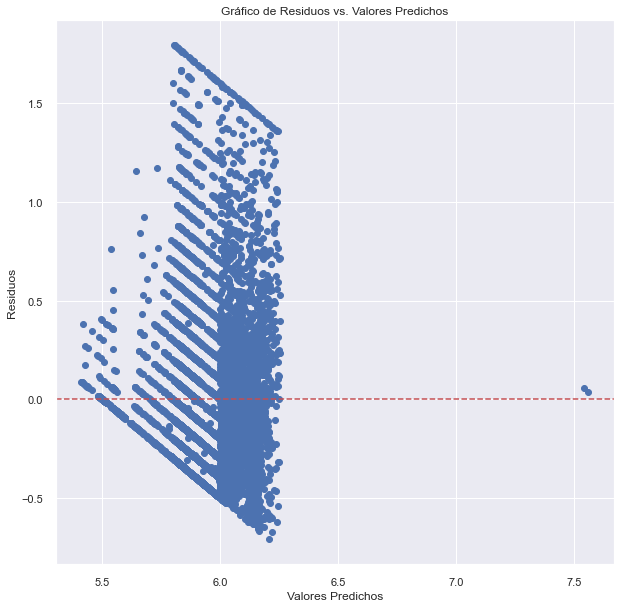

In [287]:
# Cálculo de los residuos
residuos = y_test - y_pred

# Gráfico de dispersión de residuos vs. valores predichos
plt.figure(figsize=(10,10))
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Gráfico Q-Q - Residuos')

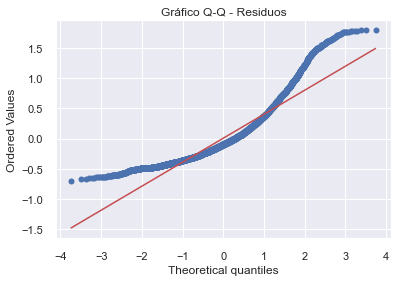

In [291]:
# Cálculo de la normalidad de los residuos
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q - Residuos")

In [309]:
# Ridge

# Declaración del modelo y fuerza de alfa
alpha = 0.25
model = Ridge(alpha=alpha)

# Fit del modelo
model.fit(X_train, y_train)

# Establecemos esquema de validación fijando random_state (reproducibilidad)
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=2023)

# Obtenemos los resultados para cada partición del CV
scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
y_pred = model.predict(X_test)

# Print de los scores:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

R2: 0.11014547827294652
MAE: 0.3164147502353758
MSE: 0.1793432988999971


In [319]:
# Lasso

# Declaración del modelo y fuerza de alfa
alpha_lasso = 0.25
model_lasso = Lasso(alpha=alpha_lasso)

# Fit del modelo
model_lasso.fit(X_train, y_train)

# Establecemos esquema de validación fijando random_state (reproducibilidad)
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=12345)
scoring = {'R2':  make_scorer(r2_score), 
           'MAE':  make_scorer(mean_absolute_error), 
           'MSE':  make_scorer(mean_squared_error)}


# Obtenemos los resultados para cada partición del CV
scores = cross_validate(model_lasso, X_train, y_train, cv=cv, scoring=scoring)
y_pred = model_lasso.predict(X_test)

# Print de los scores:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


R2: 0.09422256526092432
MAE: 0.32060022974753116
MSE: 0.18255243890878345


In [279]:
# DecisionTreeRegressor

# Declaración del modelo y la profundidad del bosque
max_depth = 8
model = DecisionTreeRegressor(max_depth=max_depth)

# Fit del modelo
model.fit(X_train, y_train)

# Establecemos esquema de validación fijando random_state (reproducibilidad)
cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=12345)
scoring = {'R2':  make_scorer(r2_score), 
           'MAE':  make_scorer(mean_absolute_error), 
           'MSE':  make_scorer(mean_squared_error)}

# Obtenemos los resultados para cada partición del CV
scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
y_pred = model.predict(X_test)

# Print de los scores:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

R2: 0.1830283279040521
MAE: 0.2964207842655434
MSE: 0.16465432405419167


In [322]:
# RandomForest

model = RandomForestRegressor(random_state=2023)

model_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 8, 10, 20],    
    'min_samples_leaf': [1, 2, 4]  
}

# Establecemos esquema de validación fijando random_state (reproducibilidad)
grid_search = GridSearchCV(estimator=model, param_grid=model_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print de mejor hiperparámetros
params = grid_search.best_params_
print(f'Best Hyperparameters: {params}')

model_randomforest = grid_search.best_estimator_
y_pred = model_randomforest.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 300}
R2: 0.19306609482293524
MAE: 0.29558844947628066
MSE: 0.1626312897391804


In [324]:
# GradientBoosting Trees

# Declaración del modelo y la profundidad del bosque

model_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 8, 10, 15, 20],    
    'learning_rate': [0.01, 0.05, 0.1]  
}

model = GradientBoostingRegressor()

# Establecemos esquema de validación fijando random_state (reproducibilidad)
grid_search = GridSearchCV(estimator=model, param_grid=model_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print de mejor hiperparámetros
params = grid_search.best_params_
print(f'Best Hyperparameters: {params}')

model_randomforest = grid_search.best_estimator_
y_pred = model_randomforest.predict(X_test)

# Print de los scores:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
R2: 0.1935198754599219
MAE: 0.2964841569470546
MSE: 0.1625398337602231


In [331]:
# KNN

model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [10, 20, 50, 60, 70, 100, 193, 200, 250],    
    'weights': ['uniform', 'distance']
}

# Búsqueda por GridSearch de la mejor combinación con mejor R2
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print de mejor hiperparámetros
params = grid_search.best_params_
print(f'Best Hyperparameters: {params}')

model_knn = grid_search.best_estimator_
y_pred = model_knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


Best Hyperparameters: {'n_neighbors': 60, 'weights': 'uniform'}
R2: 0.13857628664065957
MAE: 0.3081592339627696
MSE: 0.17361328928768063


In [333]:
# XGBoost

warnings.filterwarnings('ignore')

grid_param = {
    'n_estimators': [50, 150, 200, 400],
    'learning_rate': [0.05, 0.1, 0.15, 0.2 ],
    'max_depth': [2,5,7,8, 10], 
}

model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100,            
    learning_rate=0.1,           
    max_depth=3,                  
    random_state=1965          
)

grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print de mejor hiperparámetros
params = grid_search.best_params_
print(f'Best Hyperparameters: {params}')

model_xgboost = grid_search.best_estimator_
y_pred = model_xgboost.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

Best Hyperparameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 50}
R2: 0.19472919858630988
MAE: 0.2963032810726654
MSE: 0.16229610403404096
